<a href="https://colab.research.google.com/github/Debduti/Classification-Credit-Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking Analytics Coursework 2

# Question 1. Data Cleaning and Preprocessing

We import all necessary Python Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
!pip install scorecardpy
import scorecardpy as sc
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from string import ascii_letters


     |████████████████████████████████| 55 kB 2.3 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57845 sha256=183fa4ae1187d3d0ec4b33e85418600d95ab8189c8d59881a57a97fd87691bc9
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [ ]:
sns.set(color_codes=True)

Let us read the Dataset **"CC_Modeling_Data.txt."** The data includes information from the application to the credit card in Brazil during 2007, some of which can be used to predict the performance of the loan.

In [ ]:
credit_modelling_df = pd.read_csv("CC_Modeling_Data.txt",sep = "\t",encoding= 'unicode_escape',header = None);

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
credit_modelling_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [ ]:
credit_modelling_df.shape

(50000, 54)

The variable description is available in the Excel file **“CC_VariablesList.xls”** . We will use the contents of this dataset to form the header of our credit card application data set.

In [ ]:
col_names = pd.read_excel('CC_VariablesList.XLS')
col_names.head()


,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"


We copy the Variable Title Column into an array.

In [ ]:

col_title =  np.array(col_names["Var_Title"].copy())
col_title[43]

'EDUCATION_LEVEL'

We assign the array from the last step as the column names for our credit card dataset.

We need to rename a few columns that appear twice in the dataset. The second set of columns indicate the information about the partner/spouse and need to renamed as such.

In [ ]:
col_title[43] = 'MATE_EDUCATION_LEVEL'

In [ ]:
col_title


array(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY',
       'APPLICATION_SUBMISSION_TYPE', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH',
       'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE',


In [ ]:
credit_modelling_df.columns = col_title

In [ ]:

credit_modelling_df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


Changing the column headers to lowercase.

In [ ]:
credit_modelling_df.columns = map(str.lower, credit_modelling_df.columns)
credit_modelling_df.rename(columns={'target_label_bad=1' : 'target'},inplace = True)

credit_modelling_df

,id_client,clerk_type,payment_day,application_submission_type,quant_additional_cards,postal_address_type,sex,marital_status,quant_dependants,education_level,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_mobile_phone,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,professional_city,professional_borough,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,mate_profession_code,mate_education_level,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,flag_acsp_record,age,residencial_zip_3,professional_zip_3,target
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


Let us take a look into the dataset to understand it's summary statistics

In [ ]:
credit_modelling_df.describe()

,id_client,payment_day,quant_additional_cards,postal_address_type,marital_status,quant_dependants,education_level,nacionality,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,months_in_the_job,profession_code,occupation_type,mate_profession_code,mate_education_level,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,age,target
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   clerk_type                      50000 non-null  object 
 2   payment_day                     50000 non-null  int64  
 3   application_submission_type     50000 non-null  object 
 4   quant_additional_cards          50000 non-null  int64  
 5   postal_address_type             50000 non-null  int64  
 6   sex                             50000 non-null  object 
 7   marital_status                  50000 non-null  int64  
 8   quant_dependants                50000 non-null  int64  
 9   education_level                 50000 non-null  int64  
 10  state_of_birth                  50000 non-null  object 
 11  city_of_birth                   50000 non-null  object 
 12  nacionality                     

In [ ]:
credit_modelling_df.columns

Index(['id_client', 'clerk_type', 'payment_day', 'application_submission_type',
       'quant_additional_cards', 'postal_address_type', 'sex',
       'marital_status', 'quant_dependants', 'education_level',
       'state_of_birth', 'city_of_birth', 'nacionality', 'residencial_state',
       'residencial_city', 'residencial_borough', 'flag_residencial_phone',
       'residencial_phone_area_code', 'residence_type', 'months_in_residence',
       'flag_mobile_phone', 'flag_email', 'personal_monthly_income',
       'other_incomes', 'flag_visa', 'flag_mastercard', 'flag_diners',
       'flag_american_express', 'flag_other_cards', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'company', 'professional_state', 'professional_city',
       'professional_borough', 'flag_professional_phone',
       'professional_phone_area_code', 'months_in_the_job', 'profession_code',
       'occupation_type', 'mate_profession_code', 'mate_educatio

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = credit_modelling_df.select_dtypes(include= numerics).columns
numeric_columns = numeric_columns[1:-1]
numeric_columns

Index(['payment_day', 'quant_additional_cards', 'postal_address_type',
       'marital_status', 'quant_dependants', 'education_level', 'nacionality',
       'residence_type', 'months_in_residence', 'flag_email',
       'personal_monthly_income', 'other_incomes', 'flag_visa',
       'flag_mastercard', 'flag_diners', 'flag_american_express',
       'flag_other_cards', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'months_in_the_job', 'profession_code', 'occupation_type',
       'mate_profession_code', 'mate_education_level',
       'flag_home_address_document', 'flag_rg', 'flag_cpf',
       'flag_income_proof', 'product', 'age'],
      dtype='object')

It looks like there are quite a few nulls and an outlier value in,dependents, personal income, other income. Let us visualise each variable for a better understanding of them.

For columns that do not need to participate in arithmetic calculations, we are changing the datatype from numeric to categorical.


In [ ]:

credit_modelling_df_backup = credit_modelling_df.copy()


In [ ]:

numeric_columns_true = numeric_columns[np.r_[1:2,4:5,8:9,10:12,17:22]]
numeric_columns_true

Index(['quant_additional_cards', 'quant_dependants', 'months_in_residence',
       'personal_monthly_income', 'other_incomes', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'months_in_the_job'],
      dtype='object')

In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   clerk_type                      50000 non-null  object 
 2   payment_day                     50000 non-null  int64  
 3   application_submission_type     50000 non-null  object 
 4   quant_additional_cards          50000 non-null  int64  
 5   postal_address_type             50000 non-null  int64  
 6   sex                             50000 non-null  object 
 7   marital_status                  50000 non-null  int64  
 8   quant_dependants                50000 non-null  int64  
 9   education_level                 50000 non-null  int64  
 10  state_of_birth                  50000 non-null  object 
 11  city_of_birth                   50000 non-null  object 
 12  nacionality                     

After converting the categorical variables to Categorical Datatype, let us take a look into the summary statistics of the true Numerical Variables.

In [ ]:
credit_modelling_df.describe()

,id_client,payment_day,quant_additional_cards,postal_address_type,marital_status,quant_dependants,education_level,nacionality,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,months_in_the_job,profession_code,occupation_type,mate_profession_code,mate_education_level,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,age,target
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


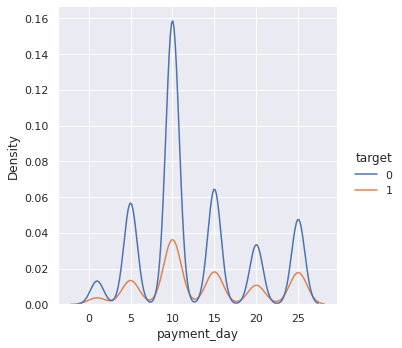

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


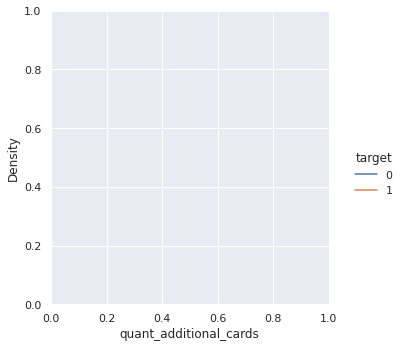

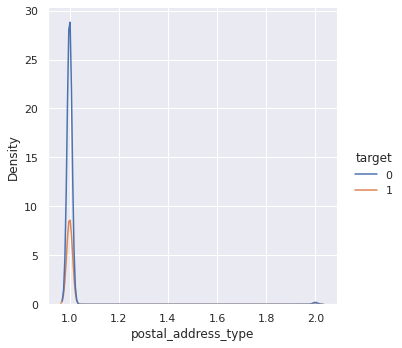

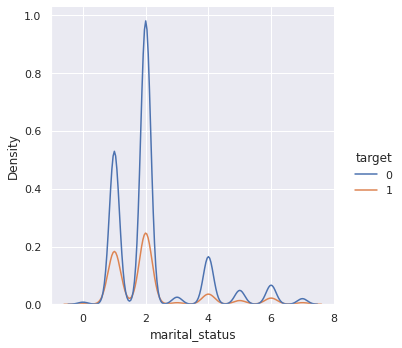

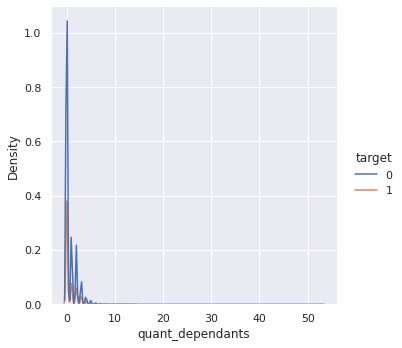

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


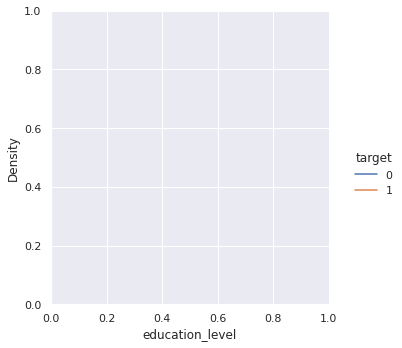

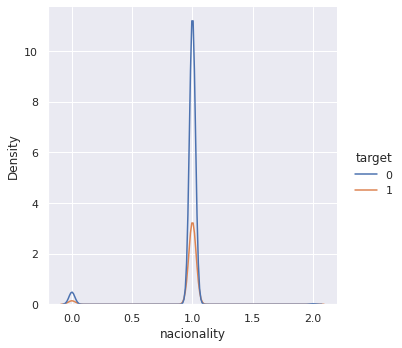

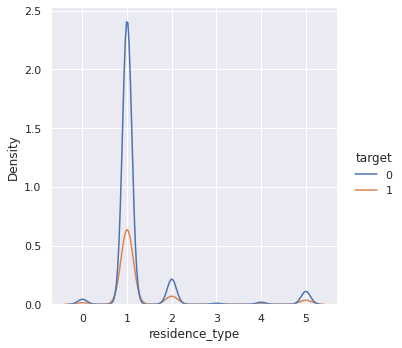

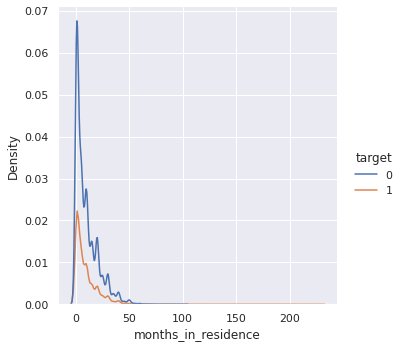

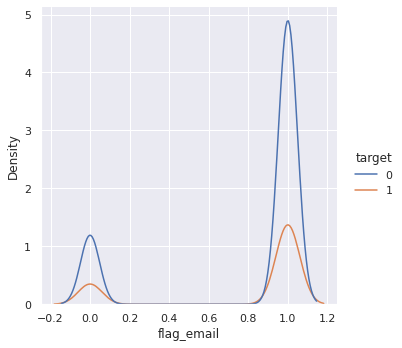

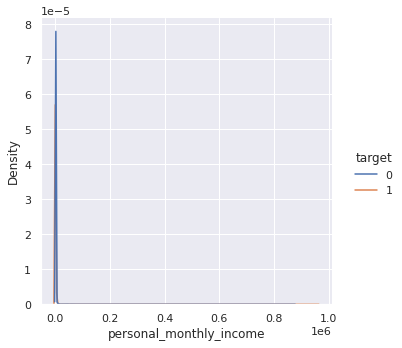

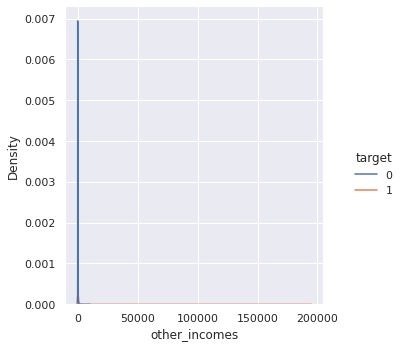

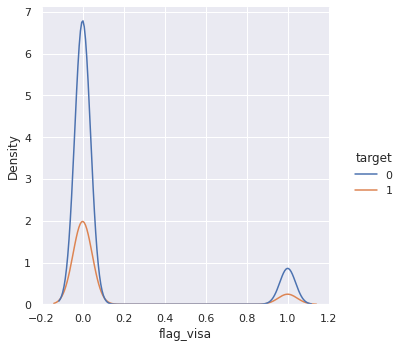

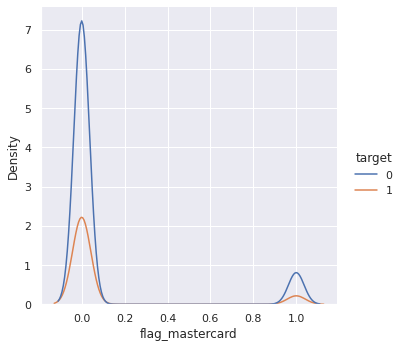

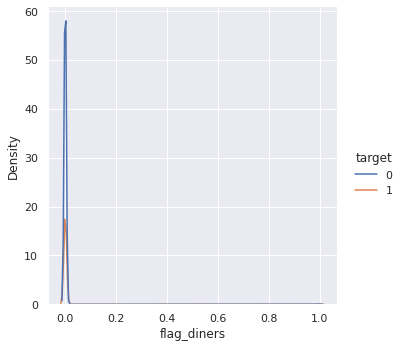

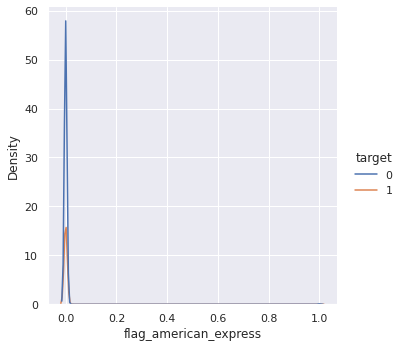

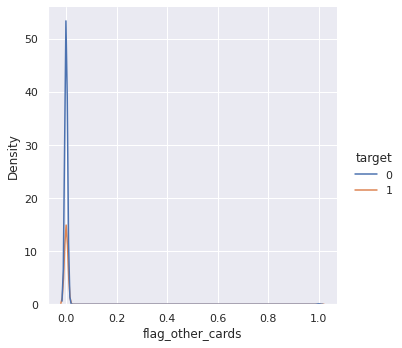

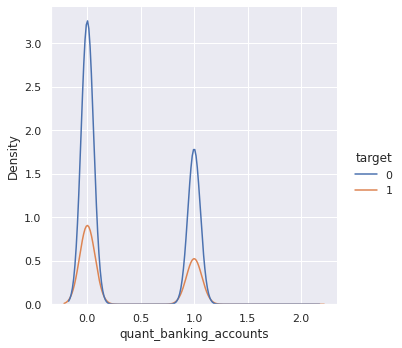

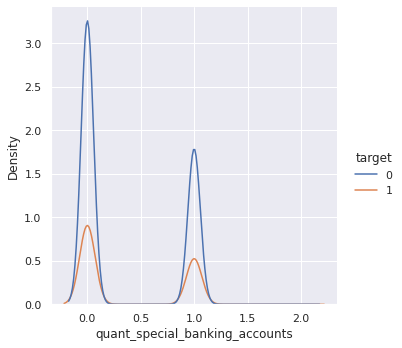

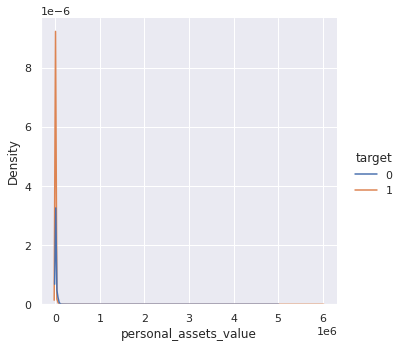

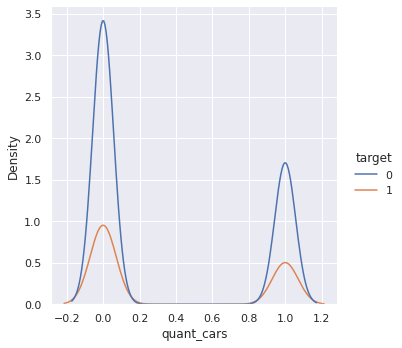

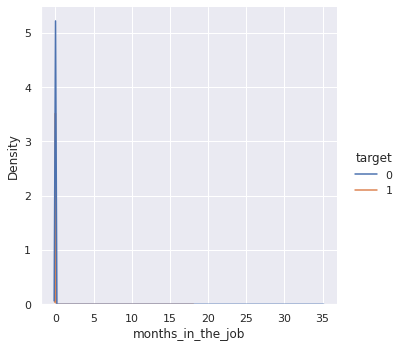

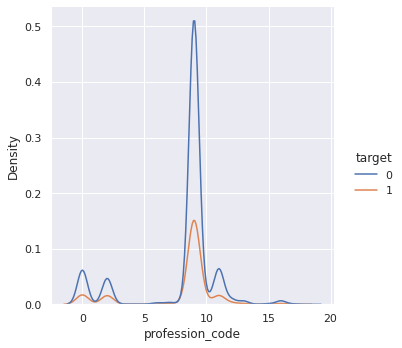

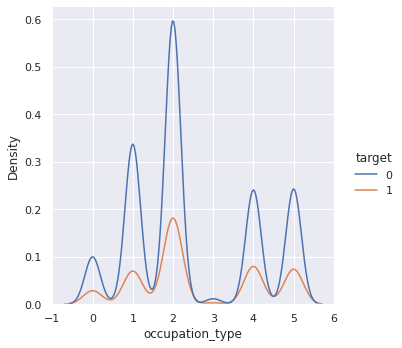

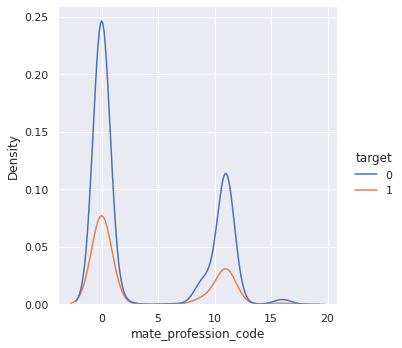

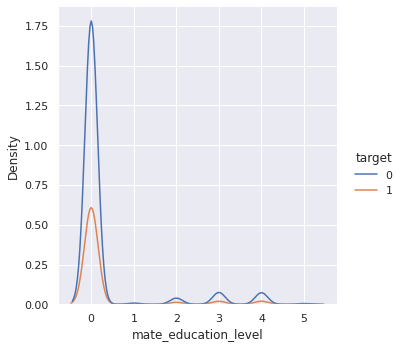

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


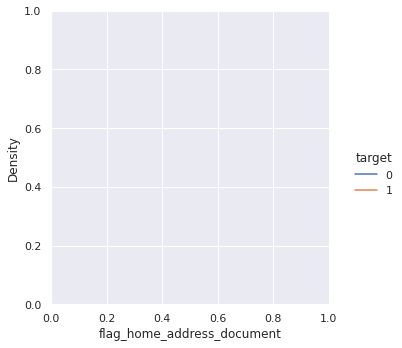

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


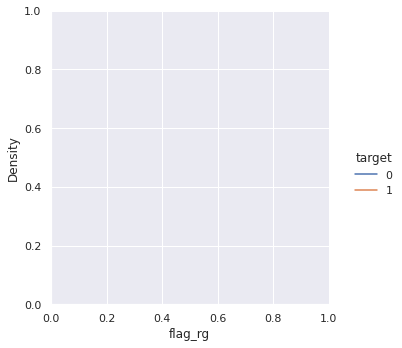

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


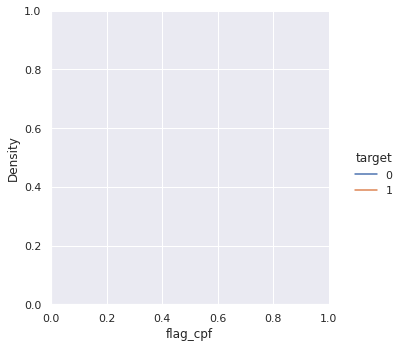

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


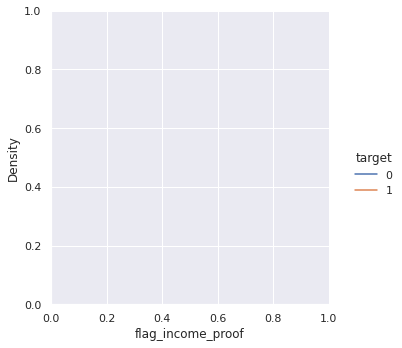

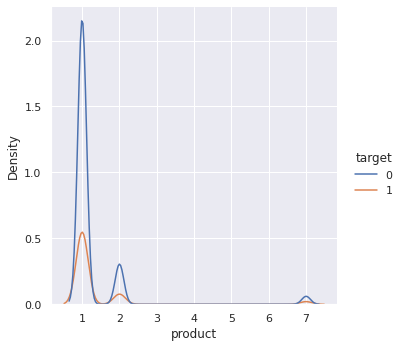

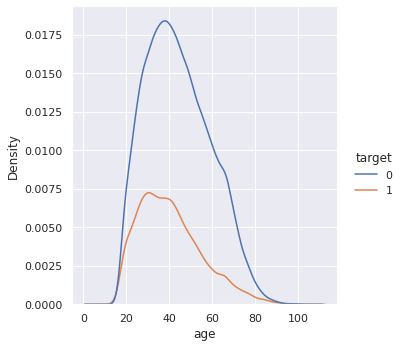

In [ ]:
sns.set(color_codes=True)

for col_id in numeric_columns:
    sns.displot(data = credit_modelling_df, x = col_id, hue = "target",kind='kde')
    plt.show();

From the above plots it is clear that Monthly Income,Other Income and Personal Assets value have big outliers. We will process them downstream.

Let us find out how many NULLS are there in each column

In [ ]:
null_columns = credit_modelling_df.columns[credit_modelling_df.isnull().any()]
null_columns

Index(['residence_type', 'months_in_residence', 'professional_city',
       'professional_borough', 'profession_code', 'occupation_type',
       'mate_profession_code', 'mate_education_level'],
      dtype='object')

In [ ]:
credit_modelling_df[null_columns].isnull().sum()

residence_type           1349
months_in_residence      3777
professional_city       33783
professional_borough    33783
profession_code          7756
occupation_type          7313
mate_profession_code    28884
mate_education_level    32338
dtype: int64

In [ ]:
credit_modelling_df.to_csv('credit_modelling_df.csv')

In [ ]:
credit_modelling_df.loc[credit_modelling_df.isnull().any(axis = 1), :]

,id_client,clerk_type,payment_day,application_submission_type,quant_additional_cards,postal_address_type,sex,marital_status,quant_dependants,education_level,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_mobile_phone,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,professional_city,professional_borough,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,mate_profession_code,mate_education_level,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,flag_acsp_record,age,residencial_zip_3,professional_zip_3,target
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


**Null Value Treatment**

Let us examine the variables one by one.

We will split the dataset into training and testing in a 70:30 ratio. We will then examine the NULL columns in the train set and replace with proper values in both the train and the test datasets.



In [ ]:
train, test = sc.split_df(credit_modelling_df.iloc[:,1:],
                          y = 'target',
                          ratio = 0.7,
                          seed = 251253766).values()

/usr/local/lib/python3.7/dist-packages/scorecardpy/condition_fun.py:62: UserWarning: There are blank strings in 9 columns, which are replaced with NaN. 
 (ColumnNames: sex, state_of_birth, city_of_birth, residencial_borough, residencial_phone_area_code, professional_state, professional_city, professional_borough, professional_phone_area_code)
  warnings.warn('There are blank strings in {} columns, which are replaced with NaN. \n (ColumnNames: {})'.format(len(blank_cols), ', '.join(blank_cols)))


**Residence type**

In [ ]:
print(credit_modelling_df.residence_type.value_counts())
print(train.residence_type.value_counts())

1.0    41572
2.0     3884
5.0     1983
0.0      760
4.0      311
3.0      141
Name: residence_type, dtype: int64
1.0    29131
2.0     2723
5.0     1374
0.0      537
4.0      218
3.0      101
Name: residence_type, dtype: int64


In [ ]:
print(credit_modelling_df.residence_type.isna().sum())
print(train.residence_type.isna().sum())

1349
916


Less than 3% of data have NULL values.It looks like a huge majority of the data has a residence type of 1. It would be reasonable to replace the NULL /missing values in the residence type with the Mode of this variable, i.e. 1.

In [ ]:

print(train.residence_type.mode()[0])


1.0


In [ ]:

credit_modelling_df.residence_type.fillna(value = train.residence_type.mode()[0], inplace=True)

In [ ]:
print(credit_modelling_df.residence_type.isna().sum())


0


In [ ]:

credit_modelling_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   clerk_type                      50000 non-null  object 
 2   payment_day                     50000 non-null  int64  
 3   application_submission_type     50000 non-null  object 
 4   quant_additional_cards          50000 non-null  int64  
 5   postal_address_type             50000 non-null  int64  
 6   sex                             50000 non-null  object 
 7   marital_status                  50000 non-null  int64  
 8   quant_dependants                50000 non-null  int64  
 9   education_level                 50000 non-null  int64  
 10  state_of_birth                  50000 non-null  object 
 11  city_of_birth                   50000 non-null  object 
 12  nacionality                     

**Months in Residence**

In [ ]:
print(credit_modelling_df.months_in_residence.isna().sum())
print(train.months_in_residence.isna().sum())
print(test.months_in_residence.isna().sum())


3777
2619
1158


Compared to the number of observations, very few  around 7.5% have Nulls in the Months in Residence column. We can replace them by the median months in residence.

In [ ]:


credit_modelling_df.months_in_residence.fillna(value = train.months_in_residence.median(), inplace=True)

credit_modelling_df.months_in_residence.isna().sum()

0

**Professional City and Professional Borough**

Professional City has a lot of NULL Values, more than 60% of the rows have NULLs in this column. We are dropping this column.


In [ ]:
credit_modelling_df.drop(columns= 'professional_city', axis =1,inplace=True)

In [ ]:
credit_modelling_df.drop(columns= 'professional_borough', axis=1,inplace=True)

In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   clerk_type                      50000 non-null  object 
 2   payment_day                     50000 non-null  int64  
 3   application_submission_type     50000 non-null  object 
 4   quant_additional_cards          50000 non-null  int64  
 5   postal_address_type             50000 non-null  int64  
 6   sex                             50000 non-null  object 
 7   marital_status                  50000 non-null  int64  
 8   quant_dependants                50000 non-null  int64  
 9   education_level                 50000 non-null  int64  
 10  state_of_birth                  50000 non-null  object 
 11  city_of_birth                   50000 non-null  object 
 12  nacionality                     

**Professional Code**

In [ ]:
print(credit_modelling_df.profession_code.value_counts())
print(train.profession_code.value_counts())
print(test.profession_code.value_counts())

9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: profession_code, dtype: int64
9.0     21094
11.0     2482
0.0      2444
2.0      1982
12.0      341
10.0      320
16.0      240
13.0      227
7.0       158
8.0       105
6.0        89
15.0       40
17.0       21
4.0        20
3.0        15
5.0        10
14.0        7
1.0         5
18.0        1
Name: profession_code, dtype: int64
9.0     8998
0.0     1096
11.0    1063
2.0      845
12.0     148
10.0     105
16.0     104
13.0      86
7.0       58
6.0       47
8.0       39
15.0      23
17.0      14
4.0        7
1.0        3
3.0        3
5.0        2
14.0       2
Name: profession_code, dtype: int64


In [ ]:
credit_modelling_df.groupby(['profession_code']).personal_monthly_income.median()

profession_code
0.0      500.000
1.0     1106.095
2.0      500.000
3.0     1108.765
4.0      850.000
5.0      935.000
6.0      506.000
7.0     1192.000
8.0     1200.000
9.0      500.000
10.0     719.000
11.0     480.000
12.0     662.000
13.0     484.000
14.0     381.000
15.0     415.000
16.0     417.000
17.0     605.000
18.0     477.000
Name: personal_monthly_income, dtype: float64

Let us create a new profession code 19 to replace all NULL values.



In [ ]:
print(credit_modelling_df.profession_code.isna().sum())
print(train.profession_code.isna().sum())
print(test.profession_code.isna().sum())

7756
5399
2357


More than 10 % data has NULL values in the profession code. It might simply mean that the borrower is unemployed, OR it maybe wrong data and should have an existing valid profession code. We cannot know for sure, so we are creating a new category 19 to replace the NULL values.

In [ ]:

credit_modelling_df.profession_code.fillna(value ='19', inplace=True)
train.profession_code.fillna(value ='19', inplace=True)

In [ ]:
credit_modelling_df.groupby(['profession_code']).personal_monthly_income.median()

profession_code
0.0      500.000
1.0     1106.095
2.0      500.000
3.0     1108.765
4.0      850.000
5.0      935.000
6.0      506.000
7.0     1192.000
8.0     1200.000
9.0      500.000
10.0     719.000
11.0     480.000
12.0     662.000
13.0     484.000
14.0     381.000
15.0     415.000
16.0     417.000
17.0     605.000
18.0     477.000
19       472.365
Name: personal_monthly_income, dtype: float64

**Occupation Type**

Replacing NULLs with new category

In [ ]:
print(credit_modelling_df.occupation_type.value_counts())
print(train.occupation_type.value_counts())
print(test.occupation_type.value_counts())

2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: occupation_type, dtype: int64
2.0    11824
1.0     6101
4.0     4911
5.0     4858
0.0     1950
3.0      222
Name: occupation_type, dtype: int64
2.0    5123
1.0    2641
4.0    2089
5.0    2033
0.0     838
3.0      97
Name: occupation_type, dtype: int64


In [ ]:
print(credit_modelling_df.occupation_type.isna().sum())
print(train.occupation_type.isna().sum())

7313
5134


More than 10 % data has NULL values in the occupation type. It might simply mean that the borrower is unemployed, OR it maybe wrong data and should have an existing valid profession code. We cannot know for sure, so we are creating a new category 6 to replace the NULL values.

In [ ]:
#Creating a new category 6 where occupation code is NULLs as 0 is a valid occupation code and a blank value might mean that they are unemployed.
credit_modelling_df.occupation_type.fillna(value = 6, inplace=True)
train.occupation_type.fillna(value = 6, inplace=True)
credit_modelling_df.occupation_type.value_counts()

2.0    16947
1.0     8742
6.0     7313
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: occupation_type, dtype: int64

In [ ]:
credit_modelling_df.groupby(['occupation_type']).personal_monthly_income.median()

occupation_type
0.0    500.0
1.0    381.0
2.0    534.0
3.0    592.0
4.0    500.0
5.0    517.0
6.0    492.0
Name: personal_monthly_income, dtype: float64

Mate Profession Code and Mate Education Level


**Mate Profession Code**

In [ ]:
credit_modelling_df.mate_profession_code.isna().sum()


28884

In [ ]:
credit_modelling_df.mate_education_level.isna().sum()

32338

In [ ]:
# Mate Profession and Education Level columns have NULLs in more than 60% rows, so we drop them
credit_modelling_df.drop(columns='mate_profession_code',inplace=True)
credit_modelling_df.drop(columns='mate_education_level',inplace=True)

In [ ]:
#credit_modelling_df.mate_education_level.value_counts()

Checking each variable
**clerk_type**                    

In [ ]:
credit_modelling_df.clerk_type.describe()

count     50000
unique        1
top           C
freq      50000
Name: clerk_type, dtype: object

All the values in the clerk_type column are same. They do not hold any significance on the outcome, so we drop this column.

In [ ]:
credit_modelling_df.drop(columns='clerk_type', inplace=True)

In [ ]:
credit_modelling_df.head()

,id_client,payment_day,application_submission_type,quant_additional_cards,postal_address_type,sex,marital_status,quant_dependants,education_level,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_mobile_phone,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,flag_acsp_record,age,residencial_zip_3,professional_zip_3,target
0,1,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,N,,0,9,4.0,0,0,0,0,1,N,32,595,595,1
1,2,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,N,,0,11,4.0,0,0,0,0,1,N,34,230,230,1
2,3,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,6.0,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,11,6.0,0,0,0,0,1,N,27,591,591,0
3,4,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,1.0,6.0,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,19,6.0,0,0,0,0,1,N,61,545,545,0
4,5,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,9,5.0,0,0,0,0,1,N,48,235,235,1


Checking each variable **payment_day**



In [ ]:
credit_modelling_df.payment_day.describe()

count    50000.000000
mean        12.869920
std          6.608385
min          1.000000
25%         10.000000
50%         10.000000
75%         15.000000
max         25.000000
Name: payment_day, dtype: float64

No Change needed in Payment Day

Checking each variable **application_submission_type**

In [ ]:
credit_modelling_df.application_submission_type.value_counts()

Web      28206
0        19461
Carga     2333
Name: application_submission_type, dtype: int64

In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   payment_day                     50000 non-null  int64  
 2   application_submission_type     50000 non-null  object 
 3   quant_additional_cards          50000 non-null  int64  
 4   postal_address_type             50000 non-null  int64  
 5   sex                             50000 non-null  object 
 6   marital_status                  50000 non-null  int64  
 7   quant_dependants                50000 non-null  int64  
 8   education_level                 50000 non-null  int64  
 9   state_of_birth                  50000 non-null  object 
 10  city_of_birth                   50000 non-null  object 
 11  nacionality                     50000 non-null  int64  
 12  residencial_state               

In [ ]:
# Replace 0 with NA

credit_modelling_df.application_submission_type.replace(to_replace = '0' ,value = 'None',inplace = True)

In [ ]:
credit_modelling_df.head(10)

,id_client,payment_day,application_submission_type,quant_additional_cards,postal_address_type,sex,marital_status,quant_dependants,education_level,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_mobile_phone,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,flag_acsp_record,age,residencial_zip_3,professional_zip_3,target
0,1,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,N,,0,9,4.0,0,0,0,0,1,N,32,595,595,1
1,2,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,N,,0,11,4.0,0,0,0,0,1,N,34,230,230,1
2,3,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,6.0,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,11,6.0,0,0,0,0,1,N,27,591,591,0
3,4,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,1.0,6.0,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,19,6.0,0,0,0,0,1,N,61,545,545,0
4,5,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,9,5.0,0,0,0,0,1,N,48,235,235,1
5,6,10,None,0,1,M,2,0,0,MG,CARMO DO RIO CLARO,1,MG,ALFENAS,Campos Eliseos,Y,33,1.0,4.0,N,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,MG,N,,0,9,2.0,0,0,0,0,2,N,40,371,371,1
6,7,15,Carga,0,1,F,2,2,0,BA,salvador,1,BA,SALVADOR,VALERIA,Y,81,1.0,1.0,N,1,320.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,11,4.0,0,0,0,0,1,N,40,413,413,1
7,8,25,Web,0,1,F,1,0,0,MG,ATALEIA,1,SP,Itapecerica da Serra,Lagoa,N,,1.0,4.0,N,1,489.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,Y,5,0,11,2.0,0,0,0,0,1,N,28,686,686,0
8,9,15,None,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,MACATUBA,PLANALTO,Y,12,1.0,0.0,N,1,450.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,N,,0,0,2.0,0,0,0,0,2,N,31,172,172,0
9,10,5,None,0,1,F,1,0,0,RS,SANTA MARIA,1,RS,PORTO ALEGRE,BOM JESUS,Y,54,1.0,5.0,N,1,1507.0,0.0,1,1,0,0,0,1,1,0.0,1,Y,RS,Y,54,0,9,2.0,0,0,0,0,1,N,41,914,914,0


Checking each variable **quant_additional_cards**

In [ ]:
credit_modelling_df.quant_additional_cards.value_counts()

0    50000
Name: quant_additional_cards, dtype: int64

In [ ]:
# Drop this variable
credit_modelling_df.drop(columns='quant_additional_cards', inplace=True)

**Postal Address Type**

In [ ]:
# Checking postal address type
credit_modelling_df.postal_address_type.value_counts()

1    49673
2      327
Name: postal_address_type, dtype: int64

No change needed in postal address type


**Sex**

In [ ]:
#Drop Sex
credit_modelling_df.drop(columns='sex', inplace=True)

We drop sex because we do not want to include any information about identity in our model.

**Marital Status**

In [ ]:
credit_modelling_df.marital_status.value_counts()

2    25967
1    15286
4     4206
6     1877
5     1296
3      632
7      534
0      202
Name: marital_status, dtype: int64

No change needed


**Education Level**

In [ ]:
#education

credit_modelling_df.education_level.value_counts()

0    50000
Name: education_level, dtype: int64

In [ ]:
# Dropping this column because all rows have value 0
credit_modelling_df.drop(columns='education_level', inplace=True)

**Place of Birth - City and State**

In [ ]:
# Place of birth

print(credit_modelling_df.state_of_birth.value_counts())
print(train.state_of_birth.value_counts())

BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: state_of_birth, dtype: int64
SP    4018
BA    3985
RS    3528
CE    3378
PE    2839
MG    2562
      1438
RN    1418
PR    1381
RJ    1282
PA    1175
AL    1169
PB    1151
MA     980
GO     805
MT     587
SC     508
PI     472
ES     444
MS     360
AC     328
AM     259
SE     251
DF     215
AP     168
TO     162
RO     107
RR      29
XX       1
Name: state_of_birth, dtype: int64


In [ ]:
# We will replace the state of birth with the mode.

credit_modelling_df.state_of_birth.replace(to_replace = ' ',value = train.state_of_birth.mode()[0],inplace = True)

In [ ]:
credit_modelling_df.state_of_birth.value_counts()

SP    7759
BA    5717
RS    5017
CE    4786
PE    4098
MG    3776
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: state_of_birth, dtype: int64

In [ ]:
#Checking values in birth city
credit_modelling_df.city_of_birth = credit_modelling_df.city_of_birth.str.lower()
train.city_of_birth = train.city_of_birth.str.lower()
credit_modelling_df.city_of_birth.value_counts()



                            2064
rio de janeiro              1458
recife                       979
sao paulo                    951
fortaleza                    947
                            ... 
santo antonio do aguapei       1
monte azul paulista            1
sucuarana                      1
mangueirinha                   1
pedras grandes                 1
Name: city_of_birth, Length: 7414, dtype: int64

In [ ]:
print(credit_modelling_df[credit_modelling_df.city_of_birth == ' '].shape[0])
print(train[credit_modelling_df.city_of_birth == ' '].shape[0])

2064
1438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
print(credit_modelling_df.city_of_birth.mode()[0])
print(train.city_of_birth.mode()[0])



The majority of records seem to have blank in the Birth City Column. We create a new category "None" to represent these values.

In [ ]:
credit_modelling_df.city_of_birth.replace(to_replace = ' ',value = 'None',inplace = True)

In [ ]:
credit_modelling_df.city_of_birth.value_counts()

None                        2064
rio de janeiro              1458
recife                       979
sao paulo                    951
fortaleza                    947
                            ... 
taquaritinga do norte          1
santo antonio do aguapei       1
monte azul paulista            1
sucuarana                      1
pedras grandes                 1
Name: city_of_birth, Length: 7414, dtype: int64

**Nationality**

In [ ]:
credit_modelling_df.nacionality.value_counts()

1    47884
0     2018
2       98
Name: nacionality, dtype: int64

No change needed.

**Residential State**

In [ ]:
credit_modelling_df.residencial_state.value_counts()

SP    8773
RS    5261
BA    4991
CE    4619
PE    3670
MG    3085
PA    2247
RJ    2143
RN    2027
GO    1694
PR    1523
AL    1467
PB    1361
MT    1301
MA     761
DF     700
MS     698
ES     688
SC     668
AP     493
AM     402
PI     374
RO     363
SE     273
AC     227
TO     130
RR      61
Name: residencial_state, dtype: int64

No change needed

**Residential City**

In [ ]:
credit_modelling_df.residencial_city = credit_modelling_df.residencial_city.str.lower()
train.residencial_city = train.residencial_city.str.lower()
credit_modelling_df.residencial_city.value_counts()

fortaleza            1671
sao paulo            1432
pelotas              1174
recife                919
natal                 879
                     ... 
cate                    1
ns sr do socorro        1
salvador  ba            1
santana do cariri       1
iuiutaba                1
Name: residencial_city, Length: 2483, dtype: int64

No Change needed.

**Residential Borough**

In [ ]:
credit_modelling_df.residencial_borough = credit_modelling_df.residencial_borough.str.lower()
train.residencial_borough = train.residencial_borough.str.lower()
credit_modelling_df.residencial_borough.describe()

count      50000
unique     11815
top       centro
freq        4944
Name: residencial_borough, dtype: object

In [ ]:
print(credit_modelling_df[credit_modelling_df.residencial_borough == ' '].shape[0])
print(train[credit_modelling_df.residencial_borough == ' '].shape[0])

10
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
credit_modelling_df.residencial_borough.value_counts()

centro                                 4944
zona rural                              449
fragata                                 401
areal                                   252
santo antonio                           250
                                       ... 
barra pojuca                              1
alto petropolis                           1
vinte seis de janeiro                     1
pirituba                                  1
conjunto habitacional maria cecilia       1
Name: residencial_borough, Length: 11815, dtype: int64

Replacing the blank values with mode

In [ ]:

credit_modelling_df.residencial_borough.replace(to_replace = ' ',value = train.residencial_borough.mode()[0],inplace = True)

**Residential Phone present Y/N**

In [ ]:
credit_modelling_df.flag_residencial_phone.value_counts()

Y    41809
N     8191
Name: flag_residencial_phone, dtype: int64

No change needed

**Phone area code**

In [ ]:
credit_modelling_df.residencial_phone_area_code.describe()

count     50000
unique      102
top            
freq       8212
Name: residencial_phone_area_code, dtype: object

In [ ]:
credit_modelling_df.residencial_phone_area_code

0        105
1         20
2        105
3           
4         20
        ... 
49995    105
49996     12
49997      5
49998     29
49999       
Name: residencial_phone_area_code, Length: 50000, dtype: object

In [ ]:
# We replace the spaces in residential phone code with Nulls.
credit_modelling_df.residencial_phone_area_code.replace(to_replace = ' ',value = 'NA',inplace = True)
credit_modelling_df.residencial_phone_area_code.isna().sum()

0

**Flag- Mobile Phone**

In [ ]:
credit_modelling_df.flag_mobile_phone.value_counts()


N    50000
Name: flag_mobile_phone, dtype: int64

In [ ]:
# Since there is only one value in all the columns, itcan be dropped.
credit_modelling_df.drop(columns = 'flag_mobile_phone',inplace=True)

**Checking Flags**

In [ ]:
credit_modelling_df.flag_email.value_counts()

1    40114
0     9886
Name: flag_email, dtype: int64

In [ ]:
credit_modelling_df.flag_visa.value_counts()

0    44428
1     5572
Name: flag_visa, dtype: int64

In [ ]:
credit_modelling_df.flag_mastercard.value_counts()

0    45127
1     4873
Name: flag_mastercard, dtype: int64

In [ ]:
credit_modelling_df.flag_american_express.value_counts()

0    49913
1       87
Name: flag_american_express, dtype: int64

In [ ]:
credit_modelling_df.flag_diners.value_counts()

0    49934
1       66
Name: flag_diners, dtype: int64

**No of bank accounts**


In [ ]:
credit_modelling_df.quant_banking_accounts.value_counts()

0    32122
1    17864
2       14
Name: quant_banking_accounts, dtype: int64

**No of special bank accounts**

In [ ]:
credit_modelling_df.quant_special_banking_accounts.value_counts()

0    32122
1    17864
2       14
Name: quant_special_banking_accounts, dtype: int64

**No of cars**

In [ ]:
credit_modelling_df.quant_cars.value_counts()

0    33193
1    16807
Name: quant_cars, dtype: int64

**Company Value**

In [ ]:
credit_modelling_df.company.value_counts()

N    27959
Y    22041
Name: company, dtype: int64

In [ ]:
credit_modelling_df.head()

,id_client,payment_day,application_submission_type,postal_address_type,marital_status,quant_dependants,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,flag_home_address_document,flag_rg,flag_cpf,flag_income_proof,product,flag_acsp_record,age,residencial_zip_3,professional_zip_3,target
0,1,5,Web,1,6,1,RN,assu,1,RN,santana do matos,centro,Y,105,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,N,,0,9,4.0,0,0,0,0,1,N,32,595,595,1
1,2,15,Carga,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,campo grande,Y,20,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,N,,0,11,4.0,0,0,0,0,1,N,34,230,230,1
2,3,5,Web,1,2,0,RN,garanhuns,1,RN,parnamirim,boa esperanca,Y,105,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,11,6.0,0,0,0,0,1,N,27,591,591,0
3,4,20,Web,1,2,0,PE,cabo,1,PE,cabo,ponte dos carvalhos,N,NA,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,19,6.0,0,0,0,0,1,N,61,545,545,0
4,5,10,Web,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,santa cruz,Y,20,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,9,5.0,0,0,0,0,1,N,48,235,235,1


**Professional State**

In [ ]:
credit_modelling_df.professional_state.value_counts()

      34307
SP     2400
RS     2092
CE     1420
BA     1387
MG     1251
PE      902
PA      710
PR      582
RJ      570
MT      553
RN      492
GO      484
PB      373
MS      352
AL      337
SC      299
DF      271
ES      228
AP      186
MA      184
RO      170
AM      134
PI      100
AC       80
SE       62
TO       58
RR       16
Name: professional_state, dtype: int64

We are replacing the blank values with a new category "NA" and not the max occuring state because the blank value might mean no employment.

In [ ]:
# We will replace the blank values in state with the max occuring state
credit_modelling_df.professional_state.replace(to_replace = " ",value = 'NA',inplace = True)
credit_modelling_df.professional_state.value_counts(0)

NA    34307
SP     2400
RS     2092
CE     1420
BA     1387
MG     1251
PE      902
PA      710
PR      582
RJ      570
MT      553
RN      492
GO      484
PB      373
MS      352
AL      337
SC      299
DF      271
ES      228
AP      186
MA      184
RO      170
AM      134
PI      100
AC       80
SE       62
TO       58
RR       16
Name: professional_state, dtype: int64

**Flag- professional phone**

In [ ]:
credit_modelling_df.flag_professional_phone.value_counts()

N    36510
Y    13490
Name: flag_professional_phone, dtype: int64

**Flag- professional phone area code**

In [ ]:
credit_modelling_df.professional_phone_area_code.value_counts()

       36532
5       1457
54      1109
107      981
97       644
       ...  
104        1
53         1
1          1
115        1
55         1
Name: professional_phone_area_code, Length: 87, dtype: int64

In [ ]:
credit_modelling_df.professional_phone_area_code.replace(to_replace = " ",value = np.NAN,inplace = True)


**More flags**

In [ ]:
credit_modelling_df.flag_home_address_document.value_counts()

0    50000
Name: flag_home_address_document, dtype: int64

In [ ]:
# dropping this column as it has only one value
credit_modelling_df.drop(columns='flag_home_address_document',inplace = True)

In [ ]:

credit_modelling_df.flag_rg.value_counts()

0    50000
Name: flag_rg, dtype: int64

In [ ]:
#dropping this column as it has only one value
credit_modelling_df.drop(columns='flag_rg',inplace = True)

In [ ]:
credit_modelling_df.flag_cpf.value_counts()

0    50000
Name: flag_cpf, dtype: int64

In [ ]:
#dropping this column as it has only one value
credit_modelling_df.drop(columns='flag_cpf',inplace = True)

In [ ]:
credit_modelling_df.flag_income_proof.value_counts()

0    50000
Name: flag_income_proof, dtype: int64

In [ ]:
#dropping this column as it has only one value
credit_modelling_df.drop(columns='flag_income_proof',inplace = True)

**Product**

In [ ]:
credit_modelling_df["product"].value_counts()
#credit_modelling_df["product"].describe()

1    42690
2     6015
7     1295
Name: product, dtype: int64

**Flag- acsp record**

In [ ]:
credit_modelling_df.flag_acsp_record.describe()

count     50000
unique        1
top           N
freq      50000
Name: flag_acsp_record, dtype: object

In [ ]:
#dropping this column as it has only one value
credit_modelling_df.drop(columns='flag_acsp_record',inplace = True)

**Age**

In [ ]:
credit_modelling_df.age.describe()

count    50000.00000
mean        43.24852
std         14.98905
min          6.00000
25%         31.00000
50%         41.00000
75%         53.00000
max        106.00000
Name: age, dtype: float64

In [ ]:
print(credit_modelling_df.age.sort_values(ascending=False))
print(train.age.sort_values(ascending=False))


17803    106
12451    106
18675    101
33611    100
37971    100
        ... 
11305     17
8384      17
45471     14
35963      7
22572      6
Name: age, Length: 50000, dtype: int64
17803    106
12451    106
18675    101
30059    100
37971    100
        ... 
2449      17
3103      17
13158     17
45471     14
35963      7
Name: age, Length: 35000, dtype: int64


From the above, Age has a lot of outliers, which we need to either correct or remove. We will treat these in the outlier treatment section.

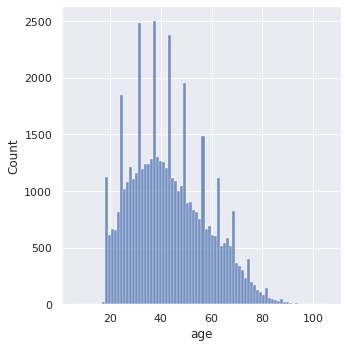

In [ ]:
fig = sns.displot(credit_modelling_df.age, kind = 'hist')
plt.savefig('Age_distribution.pdf')
plt.show();

In [ ]:
# There are a few values that are less than 17 years in the age column. We are assuming that they must erroneous entries, and we are replacing them with median.
credit_modelling_df.age = np.where(credit_modelling_df.age < 17, train.age.median(), credit_modelling_df.age)


In [ ]:
credit_modelling_df.age.sort_values(ascending=False)

17803    106.0
12451    106.0
18675    101.0
33611    100.0
30059    100.0
         ...  
5456      17.0
49640     17.0
11305     17.0
45122     17.0
18155     17.0
Name: age, Length: 50000, dtype: float64

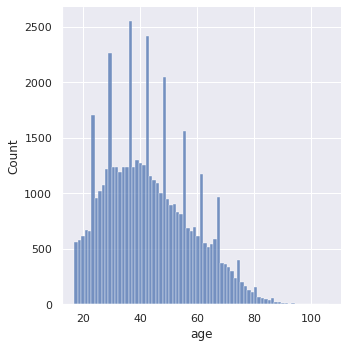

In [ ]:
fig = sns.displot(credit_modelling_df.age, kind = 'hist')
plt.savefig('Age_distribution-after treatment.pdf')
plt.show();

**Zip Code**

In [ ]:
credit_modelling_df.residencial_zip_3.describe()

count     50000
unique     1481
top         960
freq        721
Name: residencial_zip_3, dtype: int64

In [ ]:
credit_modelling_df[credit_modelling_df.residencial_zip_3 == ' ']


,id_client,payment_day,application_submission_type,postal_address_type,marital_status,quant_dependants,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target


In [ ]:
credit_modelling_df.professional_zip_3.describe()

count     50000
unique     1481
top         960
freq        721
Name: professional_zip_3, dtype: int64

In [ ]:
credit_modelling_df[credit_modelling_df.professional_zip_3 == ' ']


,id_client,payment_day,application_submission_type,postal_address_type,marital_status,quant_dependants,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target


In [ ]:
credit_modelling_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       50000 non-null  int64  
 1   payment_day                     50000 non-null  int64  
 2   application_submission_type     50000 non-null  object 
 3   postal_address_type             50000 non-null  int64  
 4   marital_status                  50000 non-null  int64  
 5   quant_dependants                50000 non-null  int64  
 6   state_of_birth                  50000 non-null  object 
 7   city_of_birth                   50000 non-null  object 
 8   nacionality                     50000 non-null  int64  
 9   residencial_state               50000 non-null  object 
 10  residencial_city                50000 non-null  object 
 11  residencial_borough             50000 non-null  object 
 12  flag_residencial_phone          

**No of dependants**

In [ ]:
credit_modelling_df.quant_dependants.value_counts()

0     33655
1      7004
2      5363
3      2465
4       860
5       365
6       139
7        65
8        35
9        14
10       13
11        7
12        6
13        4
14        3
15        1
53        1
Name: quant_dependants, dtype: int64

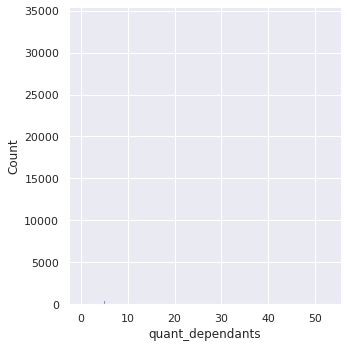

In [ ]:
fig = sns.displot(credit_modelling_df['quant_dependants'], kind = 'hist')
plt.savefig('quant_dependants.pdf')
plt.show();

In [ ]:
# 53 dependants appears to be a mistake in data entry , so we will replace this by the median quantity of dependants
credit_modelling_df.quant_dependants.replace(to_replace = 53,value = train.quant_dependants.median(),inplace = True)
credit_modelling_df.quant_dependants.value_counts()

0     33656
1      7004
2      5363
3      2465
4       860
5       365
6       139
7        65
8        35
9        14
10       13
11        7
12        6
13        4
14        3
15        1
Name: quant_dependants, dtype: int64

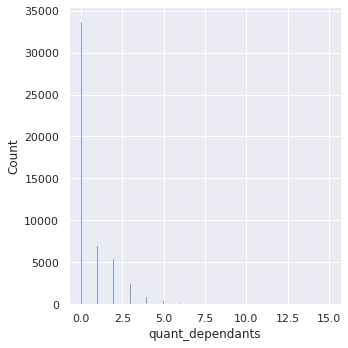

In [ ]:
fig = sns.displot(credit_modelling_df['quant_dependants'], kind = 'hist')
plt.savefig('quant_dependants-after_treatment.pdf')
plt.show();

**Income**

In [ ]:
# Let us check the monthly income, other income and personal asset value\
credit_modelling_df.personal_monthly_income.describe()

count     50000.000000
mean        886.678437
std        7846.959327
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: personal_monthly_income, dtype: float64

In [ ]:
credit_modelling_df_income = credit_modelling_df.personal_monthly_income.sort_values(ascending=False)
credit_modelling_df_income.head(50)

31053    959000.0
48271    875000.0
28119    668000.0
32630    486778.0
6501     300409.0
11404    216395.0
44240    213063.0
32747    198183.0
42748    190786.0
39985    177991.0
49073    174274.0
1033     150040.0
15519    149144.0
34525    147842.0
12565    144176.0
28196    134841.0
22411    134000.0
23112    129168.0
25412    123137.0
7419     121762.0
7010     121669.0
8319     118666.0
46193    105378.0
5399     101855.0
46895    100000.0
43057    100000.0
207       95864.0
9530      94155.0
20834     88850.0
1684      87635.0
5340      87300.0
30836     84662.0
17836     81789.0
2549      70000.0
35512     69800.0
30436     67489.0
23297     65120.0
6200      60012.0
32858     60000.0
8713      59160.0
34581     58294.0
258       56363.0
15725     56291.0
5391      55419.0
17960     53535.0
44773     53508.0
29044     52475.0
11338     46348.0
1423      46245.0
48803     45083.0
Name: personal_monthly_income, dtype: float64

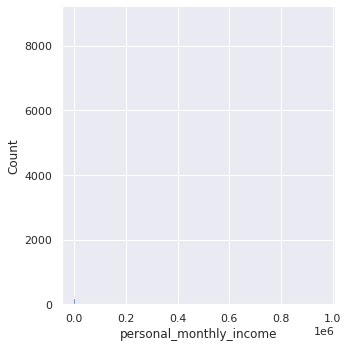

In [ ]:
fig = sns.displot(credit_modelling_df['personal_monthly_income'], kind = 'hist')
plt.savefig('personal_monthly_income.pdf')
plt.show();

In [ ]:
credit_modelling_df[credit_modelling_df.personal_monthly_income >10000].shape[0]

94

In [ ]:
print(credit_modelling_df.personal_monthly_income.mean())
print(credit_modelling_df.personal_monthly_income.median())

886.6784365999938
500.0


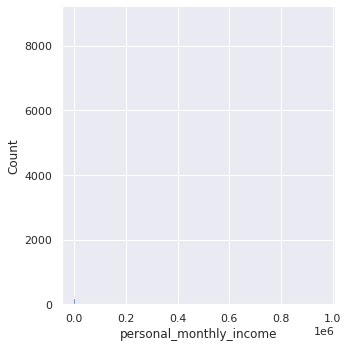

In [ ]:
fig = sns.displot(credit_modelling_df['personal_monthly_income'], kind = 'hist')
plt.savefig('personal_monthly_income-trimmed.pdf')
plt.show();

In [ ]:
credit_modelling_df.other_incomes.describe()

count     50000.000000
mean         35.434760
std         891.515142
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      194344.000000
Name: other_incomes, dtype: float64

In [ ]:

credit_modelling_df_other_incomes = credit_modelling_df.other_incomes.sort_values(ascending=False)
credit_modelling_df_other_incomes.head(50)

14197    194344.00
17256     10200.00
2992      10000.00
5140       8341.00
38820      8000.00
34017      6136.01
2038       6000.00
36141      5400.00
42777      5400.00
39734      5000.00
43873      5000.00
2442       5000.00
49660      5000.00
9895       4881.70
924        4660.00
12699      4000.00
49094      4000.00
7953       4000.00
17150      3850.00
32248      3600.00
2838       3500.00
39265      3500.00
33680      3500.00
16228      3236.68
3071       3000.00
43089      3000.00
26315      3000.00
35604      3000.00
1614       3000.00
36798      3000.00
22193      2950.00
34440      2900.00
33327      2899.00
26822      2800.00
41541      2800.00
3194       2774.83
42320      2764.00
33384      2700.00
30329      2700.00
15800      2694.00
26996      2594.00
35808      2500.00
14692      2500.00
37925      2500.00
41815      2500.00
7747       2500.00
49341      2500.00
39031      2500.00
13207      2500.00
345        2400.00
Name: other_incomes, dtype: float64

In [ ]:
print(credit_modelling_df.other_incomes.median())
print(credit_modelling_df.other_incomes.mean())

0.0
35.43475980000002


In [ ]:
#The amount 194344.00 is an outlier considering the average other income is in  a much lower range
credit_modelling_df = credit_modelling_df[credit_modelling_df.other_incomes < 20000.00]

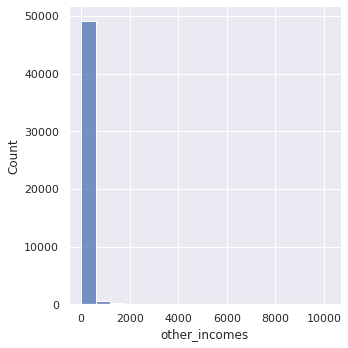

In [ ]:
fig = sns.displot(credit_modelling_df['other_incomes'], kind = 'hist')
plt.savefig('other_incomes.pdf')
plt.show();

In [ ]:
credit_modelling_df[credit_modelling_df.other_incomes > 20000].shape


(0, 40)

**Personal Assets**

In [ ]:
credit_modelling_df.personal_assets_value.describe()

count    4.999900e+04
mean     2.322419e+03
std      4.235841e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.000000e+06
Name: personal_assets_value, dtype: float64

In [ ]:

credit_modelling_df_personal_assets_value = credit_modelling_df.personal_assets_value.sort_values(ascending=False)
credit_modelling_df_personal_assets_value.head(20)

14879    6000000.0
48431    5000000.0
45968    3000000.0
35354    2500000.0
12915    1800000.0
26522    1500000.0
31684     600000.0
29605     600000.0
12111     500000.0
46559     500000.0
47038     450000.0
7974      450000.0
25917     450000.0
24129     370000.0
41218     320000.0
34073     300000.0
12699     300000.0
26126     300000.0
42673     250000.0
23474     250000.0
Name: personal_assets_value, dtype: float64

In [ ]:
print(credit_modelling_df.personal_assets_value.median())
print(credit_modelling_df.personal_assets_value.mean())

0.0
2322.4188285765713


In [ ]:
credit_modelling_df[credit_modelling_df.personal_assets_value > 1000000].shape

(6, 40)

In [ ]:
# We will make a cut at 10,00,000 for personal asset value.
credit_modelling_df=credit_modelling_df[credit_modelling_df.personal_assets_value < 1000000]
credit_modelling_df.head()


,id_client,payment_day,application_submission_type,postal_address_type,marital_status,quant_dependants,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target
0,1,5,Web,1,6,1,RN,assu,1,RN,santana do matos,centro,Y,105,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,9,4.0,1,32.0,595,595,1
1,2,15,Carga,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,campo grande,Y,20,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,NA,N,NaN,0,11,4.0,1,34.0,230,230,1
2,3,5,Web,1,2,0,RN,garanhuns,1,RN,parnamirim,boa esperanca,Y,105,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,11,6.0,1,27.0,591,591,0
3,4,20,Web,1,2,0,PE,cabo,1,PE,cabo,ponte dos carvalhos,N,NA,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,19,6.0,1,61.0,545,545,0
4,5,10,Web,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,santa cruz,Y,20,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,9,5.0,1,48.0,235,235,1


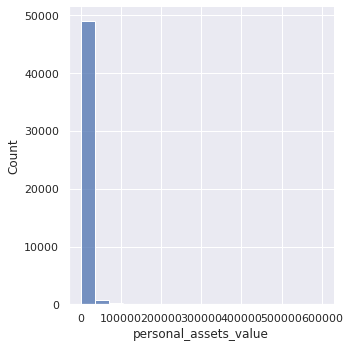

In [ ]:
fig = sns.displot(credit_modelling_df['personal_assets_value'], kind = 'hist')
plt.savefig('personal_assets_value.pdf')
plt.show();

**New Variables creation**

In [ ]:
# Creating a new column total income as a sum of personal,monthly income and other income

credit_modelling_df["total_income"] = credit_modelling_df.personal_monthly_income + credit_modelling_df.other_incomes


In [ ]:
# creating a new column total income per dependant. If there are no dependants, then the this value equal to total income

credit_modelling_df["total_income_per_dependant"] = credit_modelling_df.total_income/(credit_modelling_df.quant_dependants+1)
credit_modelling_df.head()


,id_client,payment_day,application_submission_type,postal_address_type,marital_status,quant_dependants,state_of_birth,city_of_birth,nacionality,residencial_state,residencial_city,residencial_borough,flag_residencial_phone,residencial_phone_area_code,residence_type,months_in_residence,flag_email,personal_monthly_income,other_incomes,flag_visa,flag_mastercard,flag_diners,flag_american_express,flag_other_cards,quant_banking_accounts,quant_special_banking_accounts,personal_assets_value,quant_cars,company,professional_state,flag_professional_phone,professional_phone_area_code,months_in_the_job,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant
0,1,5,Web,1,6,1,RN,assu,1,RN,santana do matos,centro,Y,105,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,9,4.0,1,32.0,595,595,1,900.0,450.0
1,2,15,Carga,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,campo grande,Y,20,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,NA,N,NaN,0,11,4.0,1,34.0,230,230,1,750.0,750.0
2,3,5,Web,1,2,0,RN,garanhuns,1,RN,parnamirim,boa esperanca,Y,105,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,11,6.0,1,27.0,591,591,0,500.0,500.0
3,4,20,Web,1,2,0,PE,cabo,1,PE,cabo,ponte dos carvalhos,N,NA,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,19,6.0,1,61.0,545,545,0,500.0,500.0
4,5,10,Web,1,2,0,RJ,rio de janeiro,1,RJ,rio de janeiro,santa cruz,Y,20,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,NA,N,NaN,0,9,5.0,1,48.0,235,235,1,1200.0,1200.0


In [ ]:
credit_modelling_df.residencial_zip_3.replace(to_replace="#DIV/0!",value = "000",inplace=True)
credit_modelling_df.professional_zip_3.replace(to_replace="#DIV/0!",value = "000",inplace=True)

In [ ]:
credit_modelling_df["total_cards"]= credit_modelling_df['flag_visa']+ credit_modelling_df['flag_mastercard']+credit_modelling_df['flag_diners']+credit_modelling_df['flag_american_express']+credit_modelling_df['flag_other_cards']

In [ ]:
credit_modelling_df.columns


Index(['id_client', 'payment_day', 'application_submission_type',
       'postal_address_type', 'marital_status', 'quant_dependants',
       'state_of_birth', 'city_of_birth', 'nacionality', 'residencial_state',
       'residencial_city', 'residencial_borough', 'flag_residencial_phone',
       'residencial_phone_area_code', 'residence_type', 'months_in_residence',
       'flag_email', 'personal_monthly_income', 'other_incomes', 'flag_visa',
       'flag_mastercard', 'flag_diners', 'flag_american_express',
       'flag_other_cards', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'company', 'professional_state', 'flag_professional_phone',
       'professional_phone_area_code', 'months_in_the_job', 'profession_code',
       'occupation_type', 'product', 'age', 'residencial_zip_3',
       'professional_zip_3', 'target', 'total_income',
       'total_income_per_dependant', 'total_cards'],
      dtype='object')

In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_client                       49993 non-null  int64  
 1   payment_day                     49993 non-null  int64  
 2   application_submission_type     49993 non-null  object 
 3   postal_address_type             49993 non-null  int64  
 4   marital_status                  49993 non-null  int64  
 5   quant_dependants                49993 non-null  int64  
 6   state_of_birth                  49993 non-null  object 
 7   city_of_birth                   49993 non-null  object 
 8   nacionality                     49993 non-null  int64  
 9   residencial_state               49993 non-null  object 
 10  residencial_city                49993 non-null  object 
 11  residencial_borough             49993 non-null  object 
 12  flag_residencial_phone          

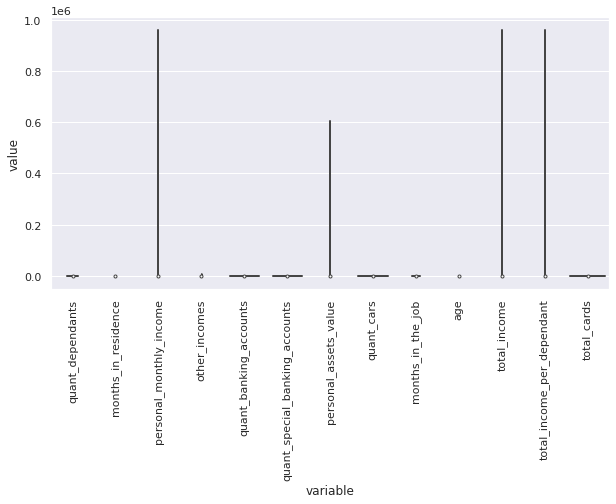

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(credit_modelling_df.iloc[:, np.r_[5,15,17:19,24:28,32,36,40:43]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Since the scale of these vraiables is hugely different, we need to normlaise these variables

In [ ]:
numeric_cols = credit_modelling_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['id_client', 'payment_day', 'postal_address_type', 'marital_status',
       'quant_dependants', 'nacionality', 'residence_type',
       'months_in_residence', 'flag_email', 'personal_monthly_income',
       'other_incomes', 'flag_visa', 'flag_mastercard', 'flag_diners',
       'flag_american_express', 'flag_other_cards', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'months_in_the_job', 'occupation_type', 'product', 'age', 'target',
       'total_income', 'total_income_per_dependant', 'total_cards'],
      dtype='object')

In [ ]:
true_numeric = credit_modelling_df.columns[np.r_[5,15,17:19,24:28,32,36,40:42]]
true_numeric

Index(['quant_dependants', 'months_in_residence', 'personal_monthly_income',
       'other_incomes', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'months_in_the_job', 'age', 'total_income',
       'total_income_per_dependant'],
      dtype='object')

In [ ]:
# Apply the zscore function to all data
credit_modelling_df_norm = credit_modelling_df.copy()
credit_modelling_df_norm[true_numeric] = credit_modelling_df[true_numeric].apply(zscore)

In [ ]:
#backup restore:
#credit_modelling_df = credit_modelling_df_backup.copy()

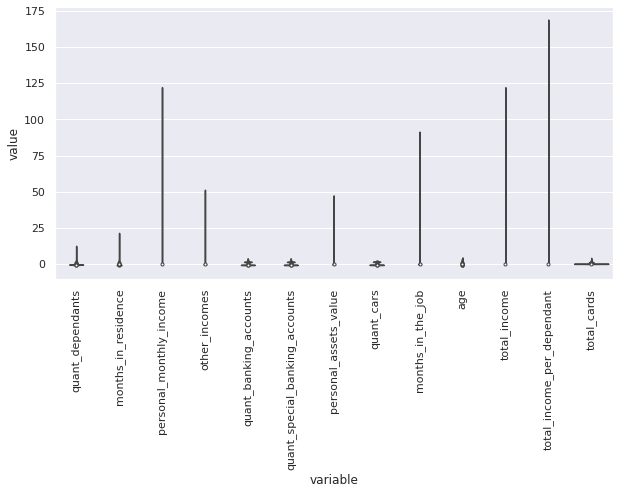

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(credit_modelling_df_norm.iloc[:, np.r_[5,15,17:19,24:28,32,36,40:43]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

**Dropping redundant columns**

We will take the information about residential and professional address from the zip, so we remove the city,state phone area code and borough.

In [ ]:
#columns_drop = ["city_of_birth", "residencial_city", "residencial_borough", "residencial_phone_area_code", "professional_phone_area_code", "residencial_zip_3", "professional_zip_3"]
columns_drop = ["city_of_birth", "residencial_city", "residencial_borough", "residencial_phone_area_code", "professional_phone_area_code"]
credit_modelling_df.drop(columns=columns_drop,axis=1,inplace=True)

In [ ]:
credit_modelling_df.shape

(49993, 38)

After the first pass of the binning code and adjustments of bins, we find that there are several variables that have only 1 bin and 0 information value. We will drop these variables from our dataset and rerun the binning function.



In [ ]:
credit_modelling_df.columns

Index(['id_client', 'payment_day', 'application_submission_type',
       'postal_address_type', 'marital_status', 'quant_dependants',
       'state_of_birth', 'nacionality', 'residencial_state',
       'flag_residencial_phone', 'residence_type', 'months_in_residence',
       'flag_email', 'personal_monthly_income', 'other_incomes', 'flag_visa',
       'flag_mastercard', 'flag_diners', 'flag_american_express',
       'flag_other_cards', 'quant_banking_accounts',
       'quant_special_banking_accounts', 'personal_assets_value', 'quant_cars',
       'company', 'professional_state', 'flag_professional_phone',
       'months_in_the_job', 'profession_code', 'occupation_type', 'product',
       'age', 'residencial_zip_3', 'professional_zip_3', 'target',
       'total_income', 'total_income_per_dependant', 'total_cards'],
      dtype='object')

In [ ]:
columns_drop_zeroiv = ["nacionality","flag_american_express","flag_visa","flag_mastercard","flag_diners","personal_assets_value","quant_special_banking_accounts","flag_email","flag_other_cards","postal_address_type","months_in_the_job"]
credit_modelling_df.drop(columns=columns_drop_zeroiv,axis=1,inplace=True)

In [ ]:
print(credit_modelling_df.columns)
print(train.columns)

Index(['id_client', 'payment_day', 'application_submission_type',
       'marital_status', 'quant_dependants', 'state_of_birth',
       'residencial_state', 'flag_residencial_phone', 'residence_type',
       'months_in_residence', 'personal_monthly_income', 'other_incomes',
       'quant_banking_accounts', 'quant_cars', 'company', 'professional_state',
       'flag_professional_phone', 'profession_code', 'occupation_type',
       'product', 'age', 'residencial_zip_3', 'professional_zip_3', 'target',
       'total_income', 'total_income_per_dependant', 'total_cards'],
      dtype='object')
Index(['clerk_type', 'payment_day', 'application_submission_type',
       'quant_additional_cards', 'postal_address_type', 'sex',
       'marital_status', 'quant_dependants', 'education_level',
       'state_of_birth', 'city_of_birth', 'nacionality', 'residencial_state',
       'residencial_city', 'residencial_borough', 'flag_residencial_phone',
       'residencial_phone_area_code', 'residence_type', 

In [ ]:

credit_modelling_df.residencial_zip_3= credit_modelling_df.residencial_zip_3.astype("int")

credit_modelling_df.professional_zip_3= credit_modelling_df.professional_zip_3.astype("int")




In [ ]:
credit_modelling_df.profession_code= credit_modelling_df.profession_code.astype("int")

credit_modelling_df.occupation_type= credit_modelling_df.occupation_type.astype("int")

In [ ]:
credit_modelling_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_client                    49993 non-null  int64  
 1   payment_day                  49993 non-null  int64  
 2   application_submission_type  49993 non-null  object 
 3   marital_status               49993 non-null  int64  
 4   quant_dependants             49993 non-null  int64  
 5   state_of_birth               49993 non-null  object 
 6   residencial_state            49993 non-null  object 
 7   flag_residencial_phone       49993 non-null  object 
 8   residence_type               49993 non-null  float64
 9   months_in_residence          49993 non-null  float64
 10  personal_monthly_income      49993 non-null  float64
 11  other_incomes                49993 non-null  float64
 12  quant_banking_accounts       49993 non-null  int64  
 13  quant_cars      

In [ ]:
credit_modelling_df.head()

,id_client,payment_day,application_submission_type,marital_status,quant_dependants,state_of_birth,residencial_state,flag_residencial_phone,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,company,professional_state,flag_professional_phone,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards
0,1,5,Web,6,1,RN,RN,Y,1.0,15.0,900.0,0.0,0,0,N,NA,N,9,4,1,32.0,595,595,1,900.0,450.0,2
1,2,15,Carga,2,0,RJ,RJ,Y,1.0,1.0,750.0,0.0,0,0,Y,NA,N,11,4,1,34.0,230,230,1,750.0,750.0,0
2,3,5,Web,2,0,RN,RN,Y,1.0,6.0,500.0,0.0,0,0,N,NA,N,11,6,1,27.0,591,591,0,500.0,500.0,0
3,4,20,Web,2,0,PE,PE,N,1.0,6.0,500.0,0.0,0,0,N,NA,N,19,6,1,61.0,545,545,0,500.0,500.0,0
4,5,10,Web,2,0,RJ,RJ,Y,1.0,12.0,1200.0,0.0,0,0,N,NA,N,9,5,1,48.0,235,235,1,1200.0,1200.0,0


In [ ]:
credit_modelling_df_backup.residencial_zip_3.value_counts()

960    721
591    547
570    508
628    459
456    444
      ... 
223      1
337      1
472      1
221      1
772      1
Name: residencial_zip_3, Length: 1481, dtype: int64

In [ ]:
credit_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_client                    49993 non-null  int64  
 1   payment_day                  49993 non-null  int64  
 2   application_submission_type  49993 non-null  object 
 3   marital_status               49993 non-null  int64  
 4   quant_dependants             49993 non-null  int64  
 5   state_of_birth               49993 non-null  object 
 6   residencial_state            49993 non-null  object 
 7   flag_residencial_phone       49993 non-null  object 
 8   residence_type               49993 non-null  float64
 9   months_in_residence          49993 non-null  float64
 10  personal_monthly_income      49993 non-null  float64
 11  other_incomes                49993 non-null  float64
 12  quant_banking_accounts       49993 non-null  int64  
 13  quant_cars      

Binning the data to group the categorical variables. First we split the data.


In [ ]:
# Split in train and test BEFORE we apply WoE
# Student ID as seed!

train, test = sc.split_df(credit_modelling_df.iloc[:,1:],
#train, test = sc.split_df(credit_model_cleaned.iloc[:,1:],
                          y = 'target',
                          ratio = 0.7,
                          seed = 251253766).values()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 5 to 49998
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   payment_day                  14998 non-null  int64  
 1   application_submission_type  14998 non-null  object 
 2   marital_status               14998 non-null  int64  
 3   quant_dependants             14998 non-null  int64  
 4   state_of_birth               14998 non-null  object 
 5   residencial_state            14998 non-null  object 
 6   flag_residencial_phone       14998 non-null  object 
 7   residence_type               14998 non-null  float64
 8   months_in_residence          14998 non-null  float64
 9   personal_monthly_income      14998 non-null  float64
 10  other_incomes                14998 non-null  float64
 11  quant_banking_accounts       14998 non-null  int64  
 12  quant_cars                   14998 non-null  int64  
 13  company         

In [ ]:
test.describe()

,payment_day,marital_status,quant_dependants,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,12.883851,2.141219,0.652087,1.246700,9.467729,1010.816657,31.868963,0.359848,0.337445,9.705627,2.990932,1.281104,43.052074,584.726230,584.726230,0.260835,1042.685620,771.627847,0.209295
std,6.592724,1.318790,1.171856,0.863537,10.483522,12927.419363,217.932491,0.480249,0.472854,4.944294,1.878286,0.998127,15.000003,229.186916,229.186916,0.439105,12928.803633,8984.747059,0.515805
min,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,110.000000,110.000000,0.000000,60.000000,18.181818,0.000000
25%,10.000000,1.000000,0.000000,1.000000,2.000000,360.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,31.000000,449.000000,449.000000,0.000000,373.000000,283.333333,0.000000
50%,10.000000,2.000000,0.000000,1.000000,6.000000,500.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,41.000000,600.000000,600.000000,0.000000,510.105000,400.000000,0.000000
75%,15.000000,2.000000,1.000000,1.000000,14.000000,800.000000,0.000000,1.000000,1.000000,10.000000,5.000000,1.000000,53.000000,743.000000,743.000000,1.000000,820.767500,668.000000,0.000000
max,25.000000,7.000000,14.000000,5.000000,228.000000,959000.000000,10000.000000,2.000000,1.000000,19.000000,6.000000,7.000000,106.000000,997.000000,997.000000,1.000000,959000.000000,959000.000000,4.000000


Now we can bin the variables. The function woebin will do this automatically for us. It will use trees sequentially given the constraints we decide. It is good practice to not leave less than 5% of cases in each bin, and I am using 8 starting bins.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34995 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   payment_day                  34995 non-null  int64  
 1   application_submission_type  34995 non-null  object 
 2   marital_status               34995 non-null  int64  
 3   quant_dependants             34995 non-null  int64  
 4   state_of_birth               34995 non-null  object 
 5   residencial_state            34995 non-null  object 
 6   flag_residencial_phone       34995 non-null  object 
 7   residence_type               34995 non-null  float64
 8   months_in_residence          34995 non-null  float64
 9   personal_monthly_income      34995 non-null  float64
 10  other_incomes                34995 non-null  float64
 11  quant_banking_accounts       34995 non-null  int64  
 12  quant_cars                   34995 non-null  int64  
 13  company         

In [ ]:
test.head()

,payment_day,application_submission_type,marital_status,quant_dependants,state_of_birth,residencial_state,flag_residencial_phone,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,company,professional_state,flag_professional_phone,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards
5,10,None,2,0,MG,MG,Y,1.0,4.0,500.00,0.0,1,1,Y,MG,N,9,2,2,40.0,371,371,1,500.00,500.00,0
10,25,Web,2,0,CE,CE,Y,1.0,10.0,200.00,0.0,0,0,Y,NA,N,9,4,1,36.0,607,607,0,200.00,200.00,1
14,5,Web,1,0,RN,RN,Y,1.0,3.0,375.00,0.0,0,0,Y,RN,Y,9,6,1,19.0,590,590,1,375.00,375.00,0
20,1,Web,2,1,RS,MS,Y,1.0,2.0,2233.54,0.0,0,0,Y,MS,Y,7,2,1,40.0,791,791,0,2233.54,1116.77,0
21,10,Web,1,3,CE,CE,Y,1.0,6.0,612.00,0.0,0,0,N,NA,N,19,1,1,69.0,618,618,0,612.00,153.00,1


# Question2. Weight Of Evidence and Variable Selection Process

[INFO] creating woe binning ...
Binning on 34995 rows and 26 columns in 00:00:47


/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To co

{'age': <Figure size 432x288 with 2 Axes>,
 'application_submission_type': <Figure size 432x288 with 2 Axes>,
 'company': <Figure size 432x288 with 2 Axes>,
 'flag_professional_phone': <Figure size 432x288 with 2 Axes>,
 'flag_residencial_phone': <Figure size 432x288 with 2 Axes>,
 'marital_status': <Figure size 432x288 with 2 Axes>,
 'months_in_residence': <Figure size 432x288 with 2 Axes>,
 'occupation_type': <Figure size 432x288 with 2 Axes>,
 'other_incomes': <Figure size 432x288 with 2 Axes>,
 'payment_day': <Figure size 432x288 with 2 Axes>,
 'personal_monthly_income': <Figure size 432x288 with 2 Axes>,
 'product': <Figure size 432x288 with 2 Axes>,
 'profession_code': <Figure size 432x288 with 2 Axes>,
 'professional_state': <Figure size 432x288 with 2 Axes>,
 'professional_zip_3': <Figure size 432x288 with 2 Axes>,
 'quant_banking_accounts': <Figure size 432x288 with 2 Axes>,
 'quant_cars': <Figure size 432x288 with 2 Axes>,
 'quant_dependants': <Figure size 432x288 with 2 Axes

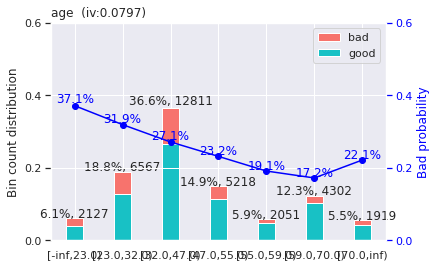

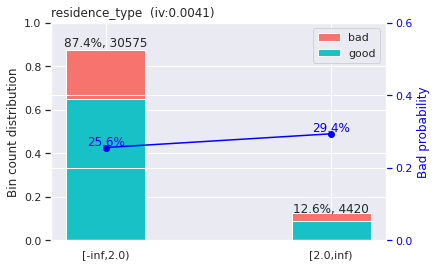

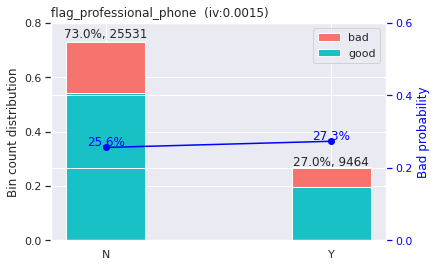

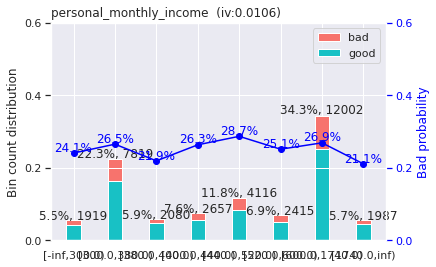

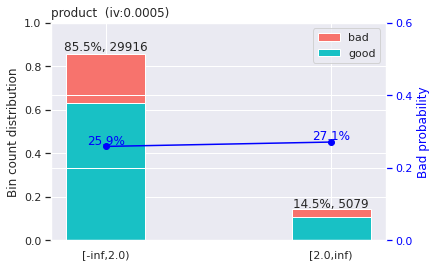

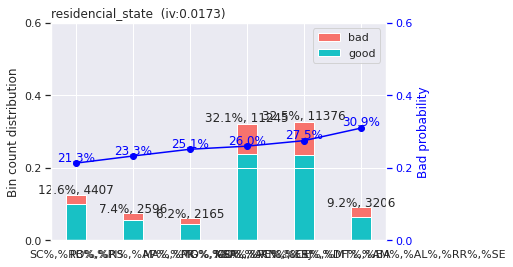

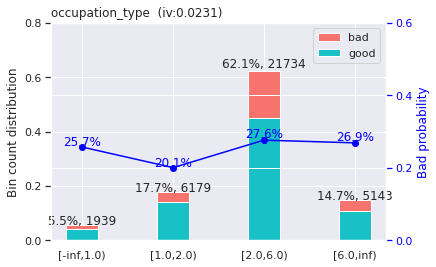

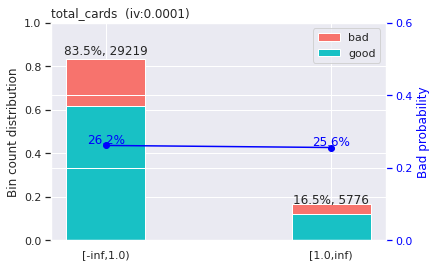

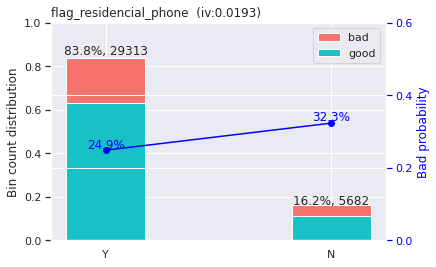

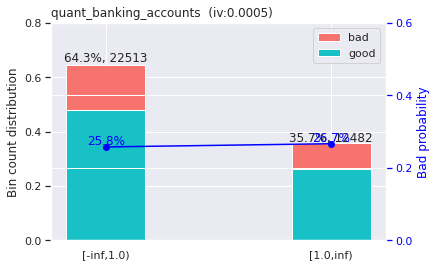

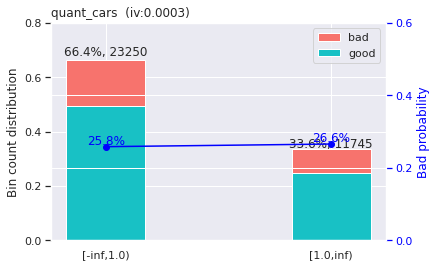

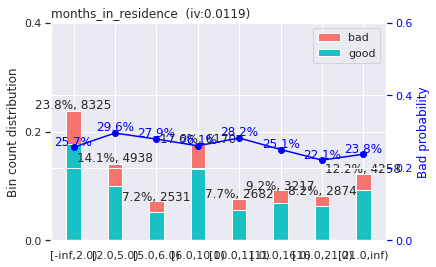

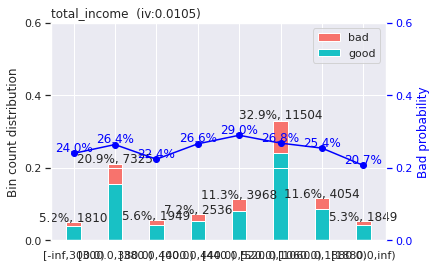

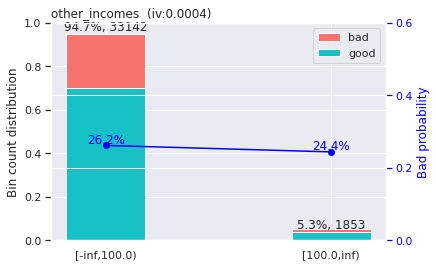

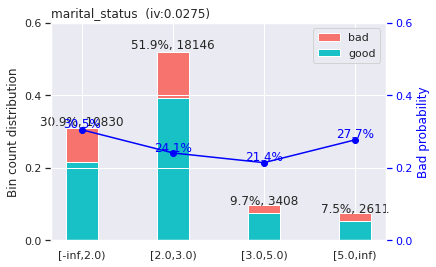

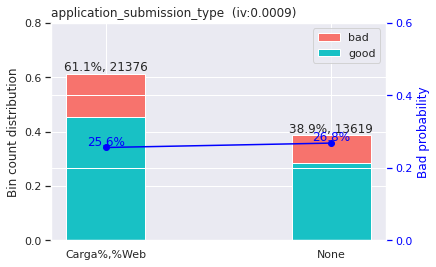

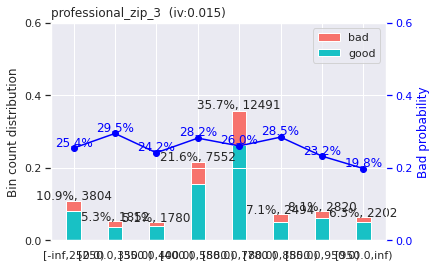

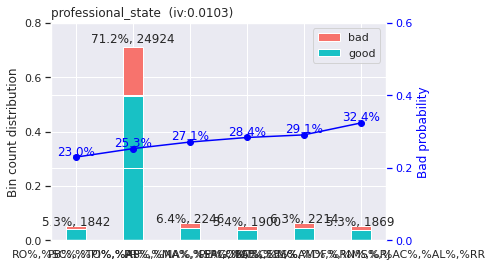

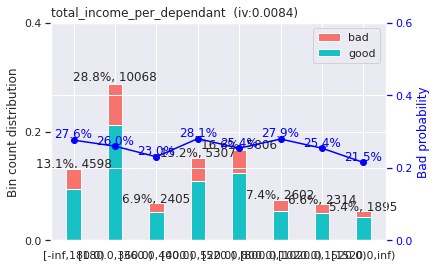

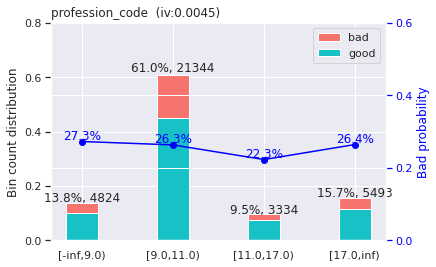

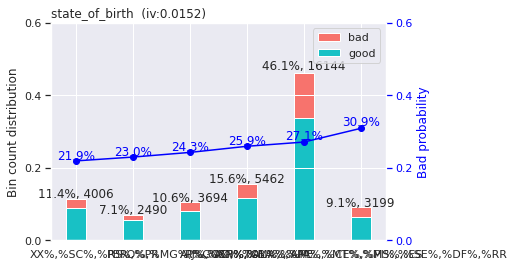

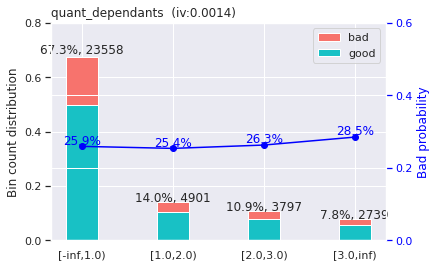

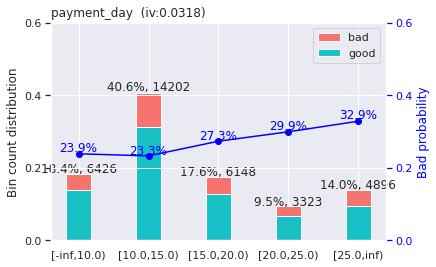

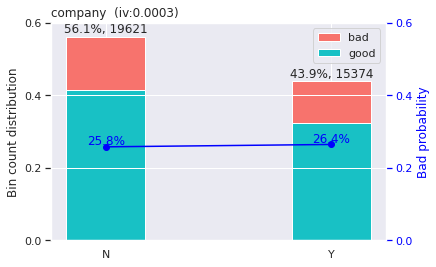

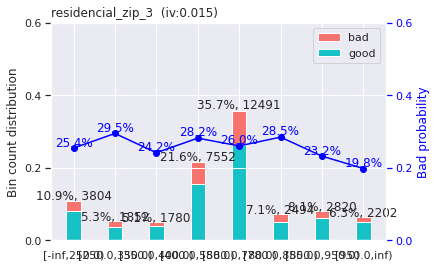

In [ ]:
bins = sc.woebin(train,
                 y = 'target',
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

bins

sc.woebin_plot(bins)

-------- 1/25 age --------
>>> dt[age].describe(): 
count    34995.000000
mean        43.334162
std         14.980623
min         17.000000
25%         32.000000
50%         42.000000
75%         54.000000
max        106.000000
Name: age, dtype: float64 



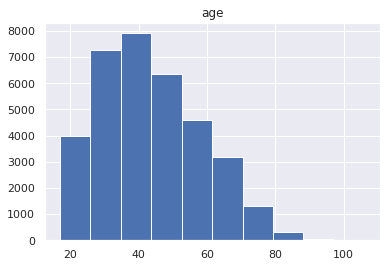

>>> Current breaks:
23.0,32.0,47.0,55.0,59.0,70.0 



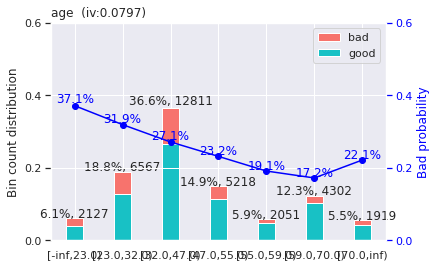

>>> Adjust breaks for (1/25) age?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 23.0,33.0,49.0,53.0,60.0,70.0
[INFO] creating woe binning ...
>>> Current breaks:
60.0, 70.0, 23.0, 53.0, 49.0, 33.0 



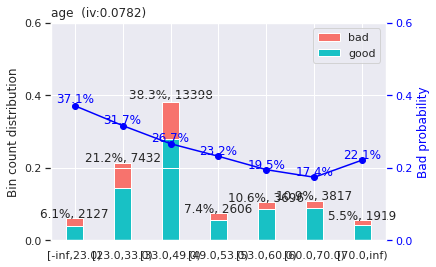

>>> Adjust breaks for (1/25) age?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/25 professional_zip_3 --------
>>> dt[professional_zip_3].describe(): 
count    34995.000000
mean       585.297900
std        227.185655
min          0.000000
25%        450.000000
50%        600.000000
75%        730.000000
max        999.000000
Name: professional_zip_3, dtype: float64 



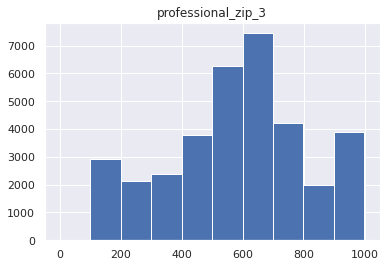

>>> Current breaks:
250.0,350.0,400.0,580.0,780.0,850.0,950.0 



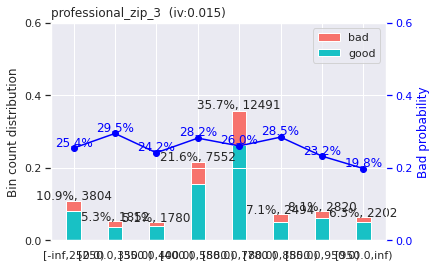

>>> Adjust breaks for (2/25) professional_zip_3?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 580.0,780.0,850.0,950.0
[INFO] creating woe binning ...
>>> Current breaks:
780.0, 580.0, 950.0, 850.0 



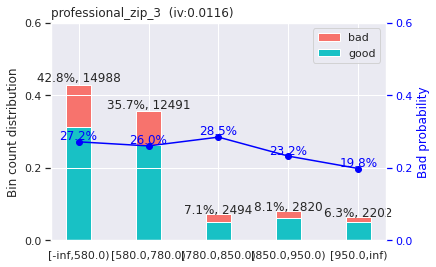

>>> Adjust breaks for (2/25) professional_zip_3?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/25 total_income --------
>>> dt[total_income].describe(): 
count     34995.000000
mean        863.863149
std        4043.573259
min          69.000000
25%         371.000000
50%         516.000000
75%         846.000000
max      300409.000000
Name: total_income, dtype: float64 



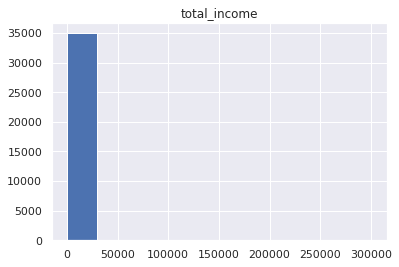

>>> Current breaks:
300.0,380.0,400.0,440.0,520.0,1060.0,1880.0 



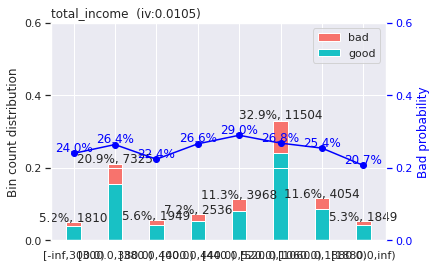

>>> Adjust breaks for (3/25) total_income?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 380.0,520.0, 1060.0, 1880.0
[INFO] creating woe binning ...
>>> Current breaks:
1060.0, 520.0, 1880.0, 380.0 



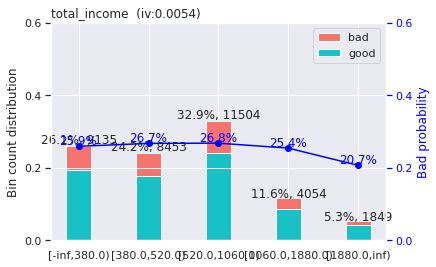

>>> Adjust breaks for (3/25) total_income?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/25 product --------
>>> dt[product].describe(): 
count    34995.000000
mean         1.273439
std          0.984135
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: product, dtype: float64 

>>> dt[product].value_counts(): 
1    29916
2     4181
7      898
Name: product, dtype: int64 

>>> Current breaks:
2.0 



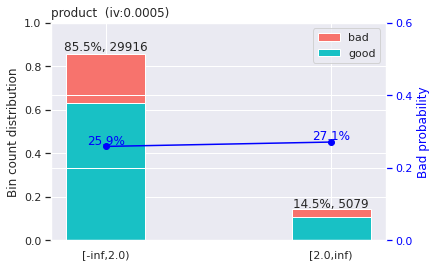

>>> Adjust breaks for (4/25) product?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/25 application_submission_type --------
>>> dt[application_submission_type].describe(): 
count     34995
unique        3
top         Web
freq      19748
Name: application_submission_type, dtype: object 

>>> dt[application_submission_type].value_counts(): 
Web      19748
None     13619
Carga     1628
Name: application_submission_type, dtype: int64 

>>> Current breaks:
'Carga%,%Web','None' 



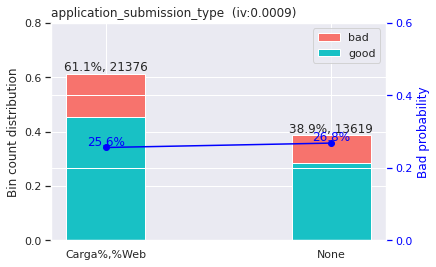

>>> Adjust breaks for (5/25) application_submission_type?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/25 other_incomes --------
>>> dt[other_incomes].describe(): 
count    34995.000000
mean        31.410867
std        190.525600
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10200.000000
Name: other_incomes, dtype: float64 



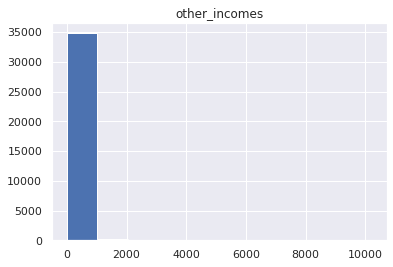

>>> Current breaks:
100.0 



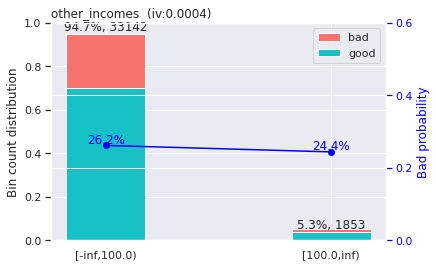

>>> Adjust breaks for (6/25) other_incomes?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/25 occupation_type --------
>>> dt[occupation_type].describe(): 
count    34995.000000
mean         3.001715
std          1.885791
min          0.000000
25%          2.000000
50%          2.000000
75%          5.000000
max          6.000000
Name: occupation_type, dtype: float64 

>>> dt[occupation_type].value_counts(): 
2    11763
1     6179
6     5143
4     4909
5     4830
0     1939
3      232
Name: occupation_type, dtype: int64 

>>> Current breaks:
1.0,2.0,6.0 



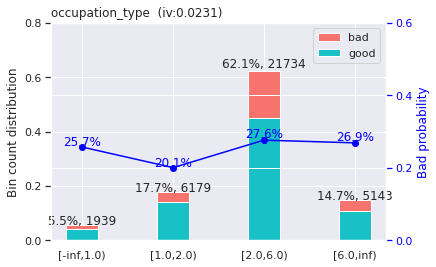

>>> Adjust breaks for (7/25) occupation_type?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 2.0,5.0
[INFO] creating woe binning ...
>>> Current breaks:
2.0, 5.0 



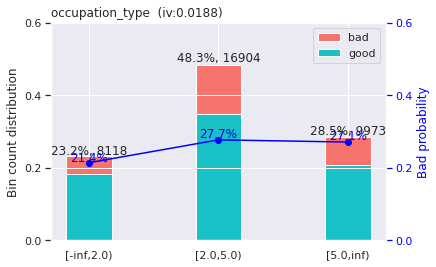

>>> Adjust breaks for (7/25) occupation_type?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/25 flag_professional_phone --------
>>> dt[flag_professional_phone].describe(): 
count     34995
unique        2
top           N
freq      25531
Name: flag_professional_phone, dtype: object 

>>> dt[flag_professional_phone].value_counts(): 
N    25531
Y     9464
Name: flag_professional_phone, dtype: int64 

>>> Current breaks:
'N','Y' 



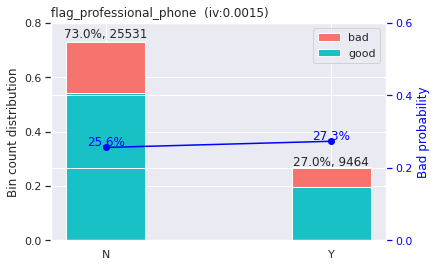

>>> Adjust breaks for (8/25) flag_professional_phone?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/25 residencial_state --------
>>> dt[residencial_state].describe(): 
count     34995
unique       27
top          SP
freq       6127
Name: residencial_state, dtype: object 

>>> dt[residencial_state].value_counts(): 
SP    6127
RS    3689
BA    3475
CE    3275
PE    2547
MG    2157
PA    1535
RN    1483
RJ    1478
GO    1167
AL    1061
PR    1028
PB     965
MT     912
MA     541
MS     495
ES     480
DF     479
SC     474
AP     333
AM     290
PI     270
RO     244
SE     196
AC     158
TO      89
RR      47
Name: residencial_state, dtype: int64 

>>> Current breaks:
'SC%,%RO%,%RS','PB%,%PI%,%AP%,%PR','MA%,%TO%,%PA','MG%,%SP%,%RN%,%RJ','GO%,%PE%,%CE%,%MT%,%BA','MS%,%AC%,%ES%,%DF%,%AM%,%AL%,%RR%,%SE' 



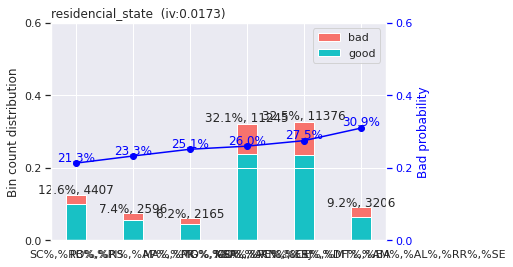

>>> Adjust breaks for (9/25) residencial_state?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/25 residence_type --------
>>> dt[residence_type].describe(): 
count    34995.000000
mean         1.244921
std          0.854303
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: residence_type, dtype: float64 

>>> dt[residence_type].value_counts(): 
1.0    30056
2.0     2721
5.0     1374
0.0      519
4.0      223
3.0      102
Name: residence_type, dtype: int64 

>>> Current breaks:
2.0 



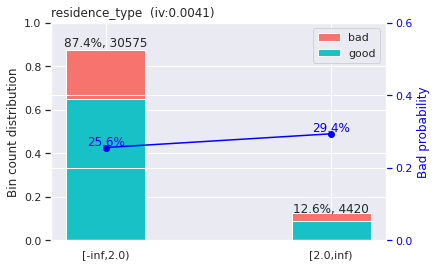

>>> Adjust breaks for (10/25) residence_type?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/25 quant_cars --------
>>> dt[quant_cars].describe(): 
count    34995.000000
mean         0.335619
std          0.472213
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: quant_cars, dtype: float64 

>>> dt[quant_cars].value_counts(): 
0    23250
1    11745
Name: quant_cars, dtype: int64 

>>> Current breaks:
1.0 



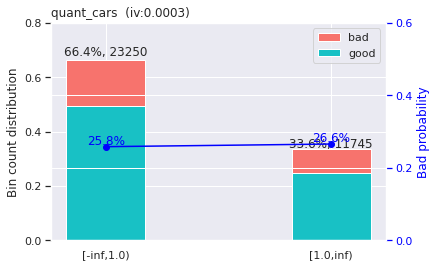

>>> Adjust breaks for (11/25) quant_cars?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/25 residencial_zip_3 --------
>>> dt[residencial_zip_3].describe(): 
count    34995.000000
mean       585.297900
std        227.185655
min          0.000000
25%        450.000000
50%        600.000000
75%        730.000000
max        999.000000
Name: residencial_zip_3, dtype: float64 



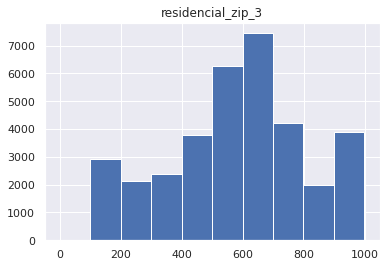

>>> Current breaks:
250.0,350.0,400.0,580.0,780.0,850.0,950.0 



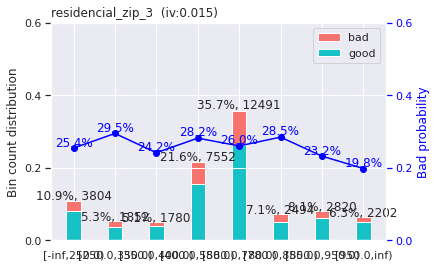

>>> Adjust breaks for (12/25) residencial_zip_3?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks:  580.0,780.0,850.0, 950.0
[INFO] creating woe binning ...
>>> Current breaks:
780.0, 580.0, 950.0, 850.0 



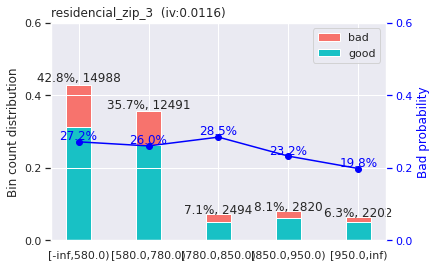

>>> Adjust breaks for (12/25) residencial_zip_3?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/25 marital_status --------
>>> dt[marital_status].describe(): 
count    34995.000000
mean         2.151364
std          1.324513
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: marital_status, dtype: float64 

>>> dt[marital_status].value_counts(): 
2    18146
1    10696
4     2960
6     1306
5      928
3      448
7      377
0      134
Name: marital_status, dtype: int64 

>>> Current breaks:
2.0,3.0,5.0 



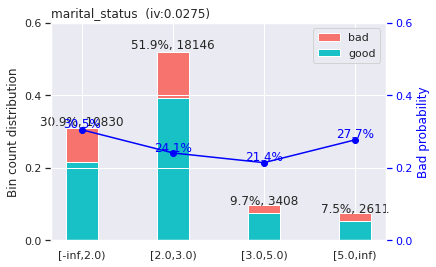

>>> Adjust breaks for (13/25) marital_status?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 2.0,3.0,5.0
[INFO] creating woe binning ...
>>> Current breaks:
2.0, 5.0, 3.0 



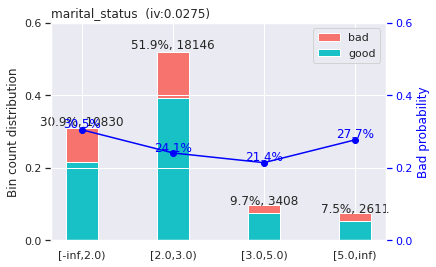

>>> Adjust breaks for (13/25) marital_status?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/25 company --------
>>> dt[company].describe(): 
count     34995
unique        2
top           N
freq      19621
Name: company, dtype: object 

>>> dt[company].value_counts(): 
N    19621
Y    15374
Name: company, dtype: int64 

>>> Current breaks:
'N','Y' 



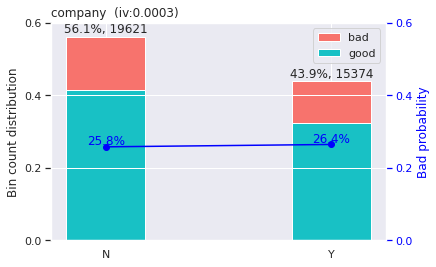

>>> Adjust breaks for (14/25) company?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/25 total_income_per_dependant --------
>>> dt[total_income_per_dependant].describe(): 
count     34995.000000
mean        676.307011
std        3378.238259
min          18.642857
25%         288.952500
50%         400.000000
75%         685.000000
max      216395.000000
Name: total_income_per_dependant, dtype: float64 



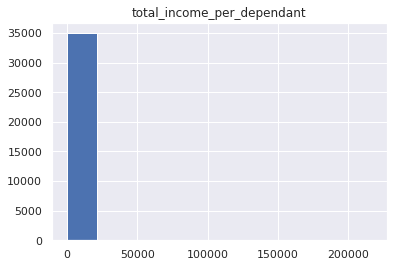

>>> Current breaks:
180.0,360.0,400.0,520.0,800.0,1020.0,1520.0 



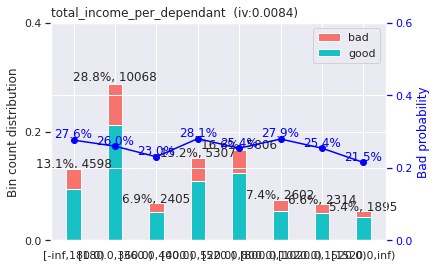

>>> Adjust breaks for (15/25) total_income_per_dependant?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 200.0, 360.0, 520.0, 800.0, 1520.0
[INFO] creating woe binning ...
>>> Current breaks:
520.0, 800.0, 200.0, 1520.0, 360.0 



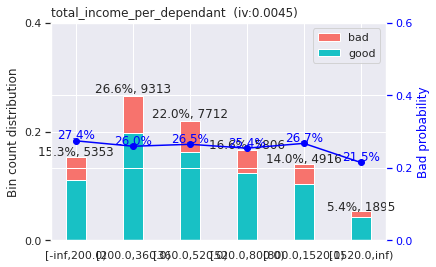

>>> Adjust breaks for (15/25) total_income_per_dependant?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/25 state_of_birth --------
>>> dt[state_of_birth].describe(): 
count     34995
unique       28
top          SP
freq       5423
Name: state_of_birth, dtype: object 

>>> dt[state_of_birth].value_counts(): 
SP    5423
BA    3958
RS    3507
CE    3387
PE    2852
MG    2611
RN    1475
PR    1356
RJ    1277
AL    1189
PA    1165
PB    1134
MA     985
GO     804
MT     593
SC     498
PI     483
ES     451
MS     346
AC     326
AM     252
SE     250
DF     215
TO     164
AP     150
RO     115
RR      28
XX       1
Name: state_of_birth, dtype: int64 

>>> Current breaks:
'XX%,%SC%,%RS','PB%,%PR','RO%,%MG%,%GO%,%TO','AP%,%RN%,%MA%,%PE','RJ%,%SP%,%BA%,%PA%,%CE%,%PI%,%ES','AC%,%AL%,%AM%,%MT%,%MS%,%SE%,%DF%,%RR' 



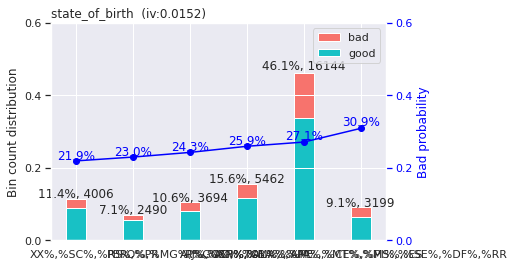

>>> Adjust breaks for (16/25) state_of_birth?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/25 personal_monthly_income --------
>>> dt[personal_monthly_income].describe(): 
count     34995.000000
mean        832.452282
std        4038.357786
min          69.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      300409.000000
Name: personal_monthly_income, dtype: float64 



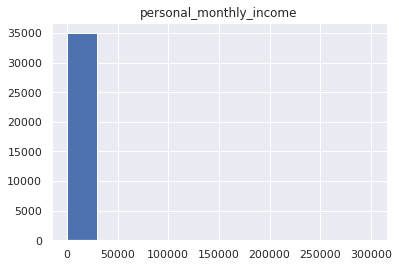

>>> Current breaks:
300.0,380.0,400.0,440.0,520.0,600.0,1740.0 



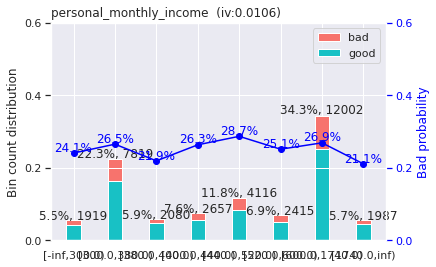

>>> Adjust breaks for (17/25) personal_monthly_income?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 400.0,620.0,940.0,1740.0
[INFO] creating woe binning ...
>>> Current breaks:
620.0, 400.0, 940.0, 1740.0 



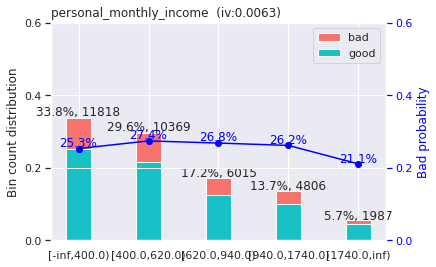

>>> Adjust breaks for (17/25) personal_monthly_income?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/25 profession_code --------
>>> dt[profession_code].describe(): 
count    34995.000000
mean         9.780397
std          4.942833
min          0.000000
25%          9.000000
50%          9.000000
75%         11.000000
max         19.000000
Name: profession_code, dtype: float64 



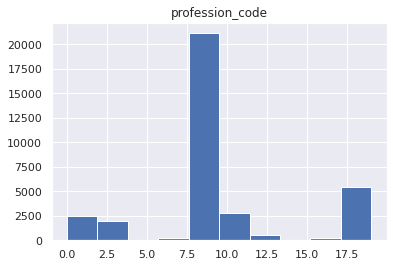

>>> Current breaks:
9.0,11.0,17.0 



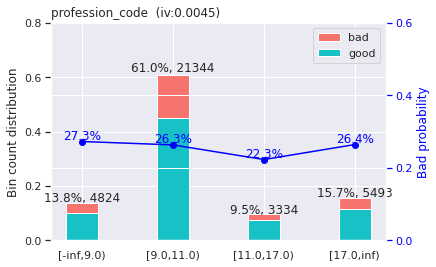

>>> Adjust breaks for (18/25) profession_code?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 9.0,11.0
[INFO] creating woe binning ...
>>> Current breaks:
11.0, 9.0 



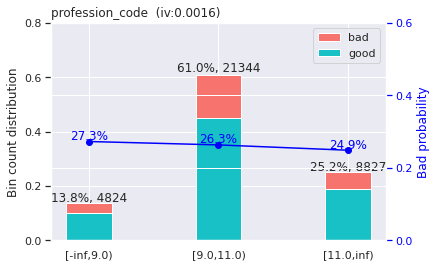

>>> Adjust breaks for (18/25) profession_code?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/25 quant_dependants --------
>>> dt[quant_dependants].describe(): 
count    34995.000000
mean         0.648093
std          1.169633
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         15.000000
Name: quant_dependants, dtype: float64 



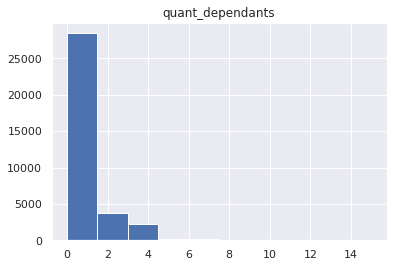

>>> Current breaks:
1.0,2.0,3.0 



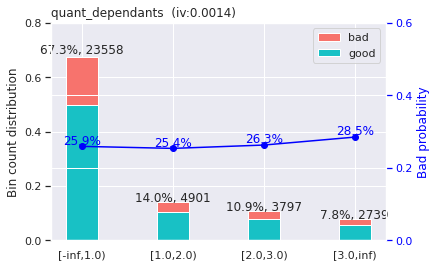

>>> Adjust breaks for (19/25) quant_dependants?
1: next 
2: yes 
3: back
Selection: 1
-------- 20/25 quant_banking_accounts --------
>>> dt[quant_banking_accounts].describe(): 
count    34995.000000
mean         0.357022
std          0.479844
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: quant_banking_accounts, dtype: float64 

>>> dt[quant_banking_accounts].value_counts(): 
0    22513
1    12470
2       12
Name: quant_banking_accounts, dtype: int64 

>>> Current breaks:
1.0 



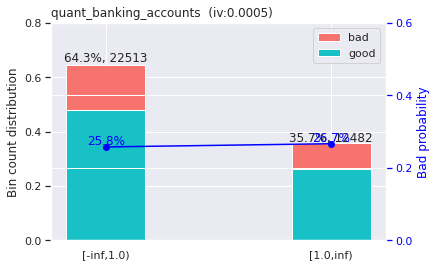

>>> Adjust breaks for (20/25) quant_banking_accounts?
1: next 
2: yes 
3: back
Selection: 1
-------- 21/25 months_in_residence --------
>>> dt[months_in_residence].describe(): 
count    34995.000000
mean         9.434262
std         10.224618
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        200.000000
Name: months_in_residence, dtype: float64 



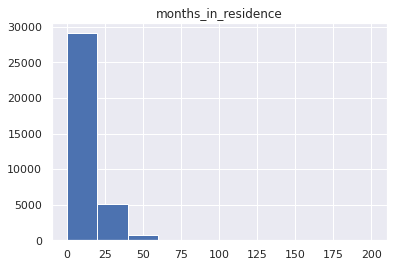

>>> Current breaks:
2.0,5.0,6.0,10.0,11.0,16.0,21.0 



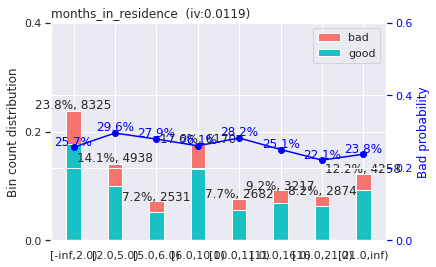

>>> Adjust breaks for (21/25) months_in_residence?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 10.0,16.0,21.0
[INFO] creating woe binning ...
>>> Current breaks:
10.0, 16.0, 21.0 



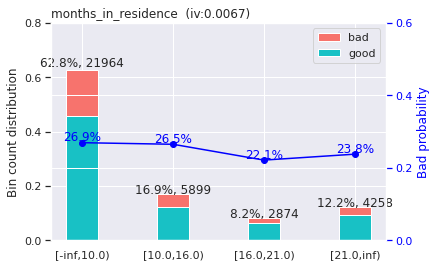

>>> Adjust breaks for (21/25) months_in_residence?
1: next 
2: yes 
3: back
Selection: 1
-------- 22/25 payment_day --------
>>> dt[payment_day].describe(): 
count    34995.000000
mean        12.864524
std          6.615707
min          1.000000
25%         10.000000
50%         10.000000
75%         15.000000
max         25.000000
Name: payment_day, dtype: float64 

>>> dt[payment_day].value_counts(): 
10    14202
15     6148
5      5167
25     4896
20     3323
1      1259
Name: payment_day, dtype: int64 

>>> Current breaks:
10.0,15.0,20.0,25.0 



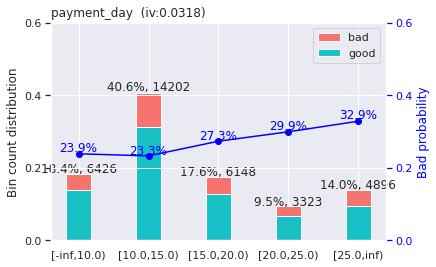

>>> Adjust breaks for (22/25) payment_day?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 15.0,20.0,25.0
[INFO] creating woe binning ...
>>> Current breaks:
20.0, 25.0, 15.0 



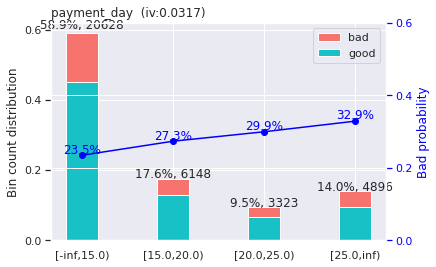

>>> Adjust breaks for (22/25) payment_day?
1: next 
2: yes 
3: back
Selection: 1
-------- 23/25 flag_residencial_phone --------
>>> dt[flag_residencial_phone].describe(): 
count     34995
unique        2
top           Y
freq      29313
Name: flag_residencial_phone, dtype: object 

>>> dt[flag_residencial_phone].value_counts(): 
Y    29313
N     5682
Name: flag_residencial_phone, dtype: int64 

>>> Current breaks:
'Y','N' 



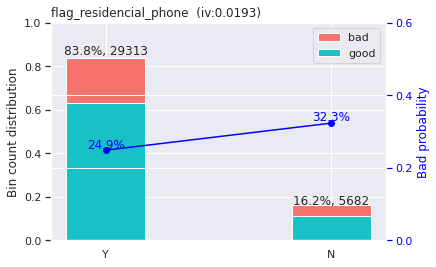

>>> Adjust breaks for (23/25) flag_residencial_phone?
1: next 
2: yes 
3: back
Selection: 1
-------- 24/25 professional_state --------
>>> dt[professional_state].describe(): 
count     34995
unique       28
top          NA
freq      24012
Name: professional_state, dtype: object 

>>> dt[professional_state].value_counts(): 
NA    24012
SP     1668
RS     1442
CE     1008
BA      964
MG      878
PE      640
PA      484
RJ      413
PR      401
MT      382
RN      361
GO      336
PB      264
MS      244
AL      239
SC      215
DF      198
ES      156
MA      133
AP      128
RO      115
AM       96
PI       70
AC       57
SE       44
TO       36
RR       11
Name: professional_state, dtype: int64 

>>> Current breaks:
'RO%,%SC%,%PI%,%RS','PB%,%TO%,%AP%,%NA%,%PA','PR%,%MA%,%SP%,%SE','PE%,%MT%,%MG','GO%,%CE%,%AM%,%RN%,%RJ','BA%,%ES%,%DF%,%MS%,%AC%,%AL%,%RR' 



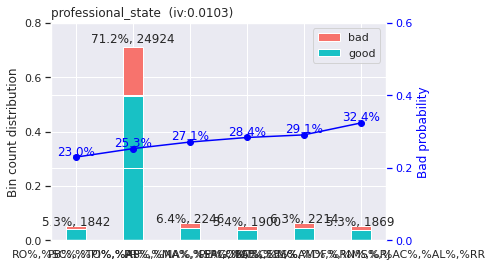

>>> Adjust breaks for (24/25) professional_state?
1: next 
2: yes 
3: back
Selection: 1
-------- 25/25 total_cards --------
>>> dt[total_cards].describe(): 
count    34995.000000
mean         0.216031
std          0.525859
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: total_cards, dtype: float64 

>>> dt[total_cards].value_counts(): 
0    29219
1     4069
2     1644
3       49
4       14
Name: total_cards, dtype: int64 

>>> Current breaks:
1.0 



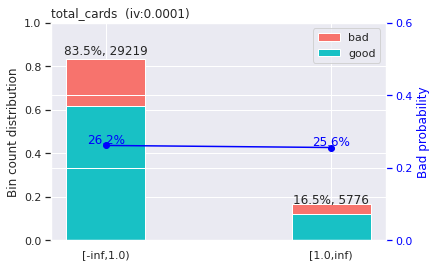

>>> Adjust breaks for (25/25) total_cards?
1: next 
2: yes 
3: back
Selection: 1


In [ ]:
# We will now manually adjust bins for any variable where the trend is not explainable
# Commenting out for subsequent iterations as we have saved the bin breaks in the dictionary item
#breaks_adj = sc.woebin_adj(train, "target", bins, adj_all_var = True)


In [ ]:
breaks_adj

"{'age': [23.0,33.0,49.0,53.0,60.0,70.0], 'application_submission_type': ['Carga%,%Web','None'], 'company': ['N','Y'], 'flag_professional_phone': ['N','Y'], 'flag_residencial_phone': ['Y','N'], 'marital_status': [2.0,3.0,5.0], 'months_in_residence': [10.0,16.0,21.0], 'occupation_type': [2.0,5.0], 'other_incomes': [100.0], 'payment_day': [15.0,20.0,25.0], 'personal_monthly_income': [400.0,620.0,940.0,1740.0], 'product': [2.0], 'profession_code': [9.0,11.0], 'professional_state': ['RO%,%SC%,%PI%,%RS','PB%,%TO%,%AP%,%NA%,%PA','PR%,%MA%,%SP%,%SE','PE%,%MT%,%MG','GO%,%CE%,%AM%,%RN%,%RJ','BA%,%ES%,%DF%,%MS%,%AC%,%AL%,%RR'], 'professional_zip_3': [580.0,780.0,850.0,950.0], 'quant_banking_accounts': [1.0], 'quant_cars': [1.0], 'quant_dependants': [1.0,2.0,3.0], 'residence_type': [2.0], 'residencial_state': ['SC%,%RO%,%RS','PB%,%PI%,%AP%,%PR','MA%,%TO%,%PA','MG%,%SP%,%RN%,%RJ','GO%,%PE%,%CE%,%MT%,%BA','MS%,%AC%,%ES%,%DF%,%AM%,%AL%,%RR%,%SE'], 'residencial_zip_3': [ 580.0,780.0,850.0, 950.0], 's

In [ ]:
breaks_adj_backup = breaks_adj

In [ ]:
breaks_adj ={'age': [23.0,33.0,49.0,53.0,60.0,70.0],
              'application_submission_type': ['Carga%,%Web','None'],
              'company': ['N','Y'],
              'flag_professional_phone': ['N','Y'],
              'flag_residencial_phone': ['Y','N'],
              'marital_status': [2.0,3.0,5.0],
              'months_in_residence': [10.0,16.0,21.0 ],
              'occupation_type': [2.0,5.0],
              'other_incomes': [100.0],
              'payment_day': [15.0,20.0,25.0],
              'personal_monthly_income': [400.0,620.0,940.0,1740.0],
              'product': [2.0],
              'profession_code': [9.0,11.0],
              'professional_state': ['RO%,%SC%,%PI%,%RS','PB%,%TO%,%AP%,%NA%,%PA','PR%,%MA%,%SP%,%SE','PE%,%MT%,%MG','GO%,%CE%,%AM%,%RN%,%RJ','BA%,%ES%,%DF%,%MS%,%AC%,%AL%,%RR'],
              'professional_zip_3': [580.0,780.0,850.0,950.0 ],
              'quant_banking_accounts': [1.0],
              'quant_cars': [1.0],
              'quant_dependants': [1.0,2.0,3.0],
              'residence_type': [2.0],
              'residencial_state': ['SC%,%RO%,%RS','PB%,%PI%,%AP%,%PR','MA%,%TO%,%PA','MG%,%SP%,%RN%,%RJ','GO%,%PE%,%CE%,%MT%,%BA','MS%,%AC%,%ES%,%DF%,%AM%,%AL%,%RR%,%SE'],
              'residencial_zip_3': [ 580.0,780.0,850.0, 950.0],
              'state_of_birth': ['XX%,%SC%,%RS','PB%,%PR','RO%,%MG%,%GO%,%TO','AP%,%RN%,%MA%,%PE','RJ%,%SP%,%BA%,%PA%,%CE%,%PI%,%ES','AC%,%AL%,%AM%,%MT%,%MS%,%SE%,%DF%,%RR'],
              'total_income': [380.0,520.0, 1060.0, 1880.0 ],
              'total_income_per_dependant': [200.0, 360.0, 520.0, 800.0, 1520.0],
              'total_cards': [1.0]}

In [ ]:
bins_adj = sc.woebin(train, y="target", breaks_list=breaks_adj) # Apply new cuts


[INFO] creating woe binning ...


In [ ]:
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34995 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   payment_day                  34995 non-null  int64  
 1   application_submission_type  34995 non-null  object 
 2   marital_status               34995 non-null  int64  
 3   quant_dependants             34995 non-null  int64  
 4   state_of_birth               34995 non-null  object 
 5   residencial_state            34995 non-null  object 
 6   flag_residencial_phone       34995 non-null  object 
 7   residence_type               34995 non-null  float64
 8   months_in_residence          34995 non-null  float64
 9   personal_monthly_income      34995 non-null  float64
 10  other_incomes                34995 non-null  float64
 11  quant_banking_accounts       34995 non-null  int64  
 12  quant_cars                   34995 non-null  int64  
 13  company         

In [ ]:
train_woe.head()

,target,product_woe,residencial_state_woe,total_cards_woe,total_income_woe,other_incomes_woe,marital_status_woe,application_submission_type_woe,professional_state_woe,state_of_birth_woe,company_woe,age_woe,residence_type_woe,flag_professional_phone_woe,personal_monthly_income_woe,occupation_type_woe,flag_residencial_phone_woe,quant_banking_accounts_woe,quant_cars_woe,months_in_residence_woe,professional_zip_3_woe,total_income_per_dependant_woe,profession_code_woe,quant_dependants_woe,payment_day_woe,residencial_zip_3_woe
0,1,-0.009097,-0.005447,-0.024781,0.037387,0.00489,0.081906,-0.024666,-0.040645,-0.007170,-0.014944,0.272346,-0.024957,-0.024053,0.038653,0.083143,-0.063814,-0.016559,-0.012711,0.021424,-0.001978,0.021176,0.012430,-0.037619,-0.140026,-0.001978
1,1,-0.009097,-0.005447,0.004864,0.037387,0.00489,-0.105190,-0.024666,-0.040645,0.052521,0.018919,0.029482,-0.024957,-0.024053,0.038653,0.083143,-0.063814,-0.016559,-0.012711,0.043846,0.056011,-0.034462,-0.064561,-0.008413,0.064441,0.056011
2,0,-0.009097,-0.005447,0.004864,0.034319,0.00489,-0.105190,-0.024666,-0.040645,-0.007170,-0.014944,0.272346,-0.024957,-0.024053,0.068750,0.052883,-0.063814,-0.016559,-0.012711,0.043846,-0.001978,0.021176,-0.064561,-0.008413,-0.140026,-0.001978
3,0,-0.009097,0.071752,0.004864,0.034319,0.00489,-0.105190,-0.024666,-0.040645,-0.007170,-0.014944,-0.516058,-0.024957,-0.024053,0.068750,0.052883,0.303130,-0.016559,-0.012711,0.043846,0.056011,0.021176,-0.064561,-0.008413,0.191748,0.056011
4,1,-0.009097,-0.005447,0.004864,-0.033951,0.00489,-0.105190,-0.024666,-0.040645,0.052521,-0.014944,0.029482,-0.024957,-0.024053,0.004909,0.052883,-0.063814,-0.016559,-0.012711,0.021424,0.056011,0.034395,0.012430,-0.008413,-0.140026,0.056011


In [ ]:
test_woe.head()

,target,product_woe,residencial_state_woe,total_cards_woe,total_income_woe,other_incomes_woe,marital_status_woe,application_submission_type_woe,professional_state_woe,state_of_birth_woe,company_woe,age_woe,residence_type_woe,flag_professional_phone_woe,personal_monthly_income_woe,occupation_type_woe,flag_residencial_phone_woe,quant_banking_accounts_woe,quant_cars_woe,months_in_residence_woe,professional_zip_3_woe,total_income_per_dependant_woe,profession_code_woe,quant_dependants_woe,payment_day_woe,residencial_zip_3_woe
5,1,0.052804,-0.005447,0.004864,0.034319,0.00489,-0.105190,0.038139,0.115510,-0.096950,0.018919,0.029482,-0.024957,-0.024053,0.068750,0.083143,-0.063814,0.029540,0.024938,0.043846,0.056011,0.021176,0.012430,-0.008413,-0.140026,0.056011
10,0,-0.009097,0.071752,-0.024781,-0.007673,0.00489,-0.105190,-0.024666,-0.040645,0.052521,0.018919,0.029482,-0.024957,-0.024053,-0.039990,0.083143,-0.063814,-0.016559,-0.012711,0.021424,-0.001978,-0.006645,0.012430,-0.008413,0.327407,-0.001978
14,1,-0.009097,-0.005447,0.004864,-0.007673,0.00489,0.216797,-0.024666,0.150637,-0.007170,0.018919,0.515619,-0.024957,0.063554,-0.039990,0.052883,-0.063814,-0.016559,-0.012711,0.043846,-0.001978,0.021176,0.012430,-0.008413,-0.140026,-0.001978
20,0,-0.009097,0.238937,0.004864,-0.303785,0.00489,-0.105190,-0.024666,0.304962,-0.228733,0.018919,0.029482,-0.024957,0.063554,-0.277916,0.083143,-0.063814,-0.016559,-0.012711,0.043846,0.120421,0.034395,0.060275,-0.037619,-0.140026,0.120421
21,0,-0.009097,0.071752,-0.024781,0.037387,0.00489,0.216797,-0.024666,-0.040645,0.052521,-0.014944,-0.516058,-0.024957,-0.024053,0.068750,-0.258663,-0.063814,-0.016559,-0.012711,0.043846,-0.001978,0.069486,-0.064561,0.120874,-0.140026,-0.001978


In [ ]:
test_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 5 to 49998
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   target                           14998 non-null  int64  
 1   product_woe                      14998 non-null  float64
 2   residencial_state_woe            14998 non-null  float64
 3   total_cards_woe                  14998 non-null  float64
 4   total_income_woe                 14998 non-null  float64
 5   other_incomes_woe                14998 non-null  float64
 6   marital_status_woe               14998 non-null  float64
 7   application_submission_type_woe  14998 non-null  float64
 8   professional_state_woe           14998 non-null  float64
 9   state_of_birth_woe               14998 non-null  float64
 10  company_woe                      14998 non-null  float64
 11  age_woe                          14998 non-null  float64
 12  residence_type_woe

In [ ]:
# Scorecard creation based on the IV
iv_df = sc.iv(train_woe, 'target')

In [ ]:
print(iv_df)

                           variable  info_value
13                          age_woe    0.078221
10                  payment_day_woe    0.031669
2                marital_status_woe    0.027454
22       flag_residencial_phone_woe    0.019313
18              occupation_type_woe    0.018752
16            residencial_state_woe    0.017281
7                state_of_birth_woe    0.015231
3            professional_zip_3_woe    0.011580
15            residencial_zip_3_woe    0.011580
20           professional_state_woe    0.010326
1           months_in_residence_woe    0.006746
12      personal_monthly_income_woe    0.006308
8                  total_income_woe    0.005412
5    total_income_per_dependant_woe    0.004517
23               residence_type_woe    0.004122
9               profession_code_woe    0.001638
17      flag_professional_phone_woe    0.001528
24             quant_dependants_woe    0.001432
14  application_submission_type_woe    0.000941
6        quant_banking_accounts_woe    0

In [ ]:
# Accepted columns will be the ones that have an IV > 0.002
columns_iv = iv_df[iv_df.info_value > 0.002].variable
accepted_columns = list(columns_iv)
accepted_columns.insert(0,"target")
print(accepted_columns)

['target', 'age_woe', 'payment_day_woe', 'marital_status_woe', 'flag_residencial_phone_woe', 'occupation_type_woe', 'residencial_state_woe', 'state_of_birth_woe', 'professional_zip_3_woe', 'residencial_zip_3_woe', 'professional_state_woe', 'months_in_residence_woe', 'personal_monthly_income_woe', 'total_income_woe', 'total_income_per_dependant_woe', 'residence_type_woe']


In [ ]:

train_woe_new = train_woe[accepted_columns]
test_woe_new = test_woe[accepted_columns]


In [ ]:
train_woe_new.head()

,target,age_woe,payment_day_woe,marital_status_woe,flag_residencial_phone_woe,occupation_type_woe,residencial_state_woe,state_of_birth_woe,professional_zip_3_woe,residencial_zip_3_woe,professional_state_woe,months_in_residence_woe,personal_monthly_income_woe,total_income_woe,total_income_per_dependant_woe,residence_type_woe
0,1,0.272346,-0.140026,0.081906,-0.063814,0.083143,-0.005447,-0.007170,-0.001978,-0.001978,-0.040645,0.021424,0.038653,0.037387,0.021176,-0.024957
1,1,0.029482,0.064441,-0.105190,-0.063814,0.083143,-0.005447,0.052521,0.056011,0.056011,-0.040645,0.043846,0.038653,0.037387,-0.034462,-0.024957
2,0,0.272346,-0.140026,-0.105190,-0.063814,0.052883,-0.005447,-0.007170,-0.001978,-0.001978,-0.040645,0.043846,0.068750,0.034319,0.021176,-0.024957
3,0,-0.516058,0.191748,-0.105190,0.303130,0.052883,0.071752,-0.007170,0.056011,0.056011,-0.040645,0.043846,0.068750,0.034319,0.021176,-0.024957
4,1,0.029482,-0.140026,-0.105190,-0.063814,0.052883,-0.005447,0.052521,0.056011,0.056011,-0.040645,0.021424,0.004909,-0.033951,0.034395,-0.024957


In [ ]:
test_woe_new.head()

,target,age_woe,payment_day_woe,marital_status_woe,flag_residencial_phone_woe,occupation_type_woe,residencial_state_woe,state_of_birth_woe,professional_zip_3_woe,residencial_zip_3_woe,professional_state_woe,months_in_residence_woe,personal_monthly_income_woe,total_income_woe,total_income_per_dependant_woe,residence_type_woe
5,1,0.029482,-0.140026,-0.105190,-0.063814,0.083143,-0.005447,-0.096950,0.056011,0.056011,0.115510,0.043846,0.068750,0.034319,0.021176,-0.024957
10,0,0.029482,0.327407,-0.105190,-0.063814,0.083143,0.071752,0.052521,-0.001978,-0.001978,-0.040645,0.021424,-0.039990,-0.007673,-0.006645,-0.024957
14,1,0.515619,-0.140026,0.216797,-0.063814,0.052883,-0.005447,-0.007170,-0.001978,-0.001978,0.150637,0.043846,-0.039990,-0.007673,0.021176,-0.024957
20,0,0.029482,-0.140026,-0.105190,-0.063814,0.083143,0.238937,-0.228733,0.120421,0.120421,0.304962,0.043846,-0.277916,-0.303785,0.034395,-0.024957
21,0,-0.516058,-0.140026,0.216797,-0.063814,-0.258663,0.071752,0.052521,-0.001978,-0.001978,-0.040645,0.043846,0.068750,0.037387,0.069486,-0.024957


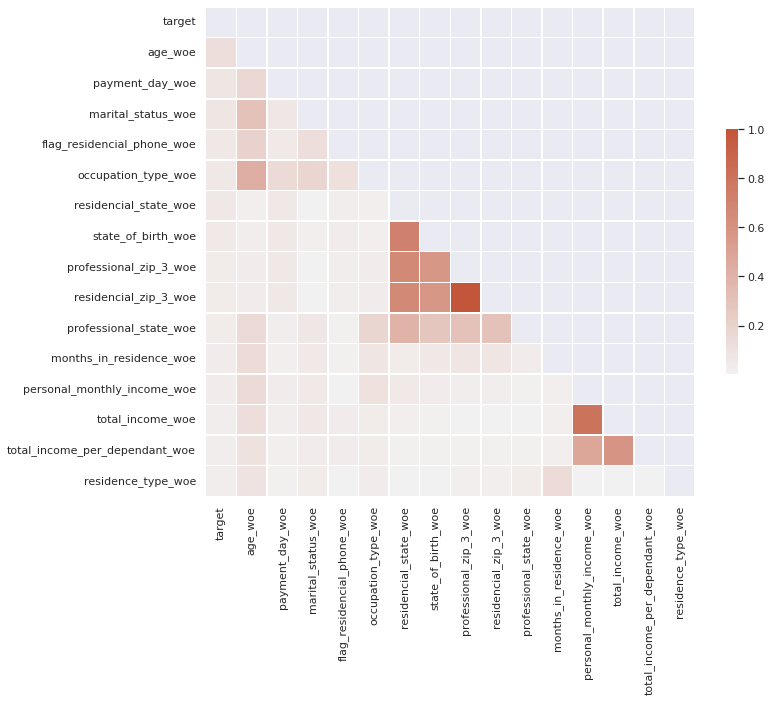

In [ ]:
corr = train_woe_new.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
corr

,target,age_woe,payment_day_woe,marital_status_woe,flag_residencial_phone_woe,occupation_type_woe,residencial_state_woe,state_of_birth_woe,professional_zip_3_woe,residencial_zip_3_woe,professional_state_woe,months_in_residence_woe,personal_monthly_income_woe,total_income_woe,total_income_per_dependant_woe,residence_type_woe
target,1.000000,0.121178,0.079330,0.073058,0.062663,0.058760,0.057226,0.053957,0.045849,0.045849,0.045397,0.035431,0.034136,0.031289,0.028863,0.028648
age_woe,0.121178,1.000000,0.164328,0.304497,0.200864,0.431155,0.021874,0.030964,0.039328,0.039328,0.156370,0.145713,0.150905,0.119968,0.099895,0.095205
payment_day_woe,0.079330,0.164328,1.000000,0.070784,0.054862,0.156865,0.057184,0.057662,0.060575,0.060575,0.032476,0.018545,0.038149,0.027180,0.024918,0.012527
marital_status_woe,0.073058,0.304497,0.070784,1.000000,0.124739,0.182208,0.004903,0.022373,0.007982,0.007982,0.065308,0.053277,0.053482,0.062975,0.034536,0.041370
flag_residencial_phone_woe,0.062663,0.200864,0.054862,0.124739,1.000000,0.115092,0.026091,0.040506,0.028052,0.028052,0.015047,0.016271,0.005102,0.038493,0.034505,0.002253
occupation_type_woe,0.058760,0.431155,0.156865,0.182208,0.115092,1.000000,0.022243,0.023901,0.035851,0.035851,0.181251,0.079645,0.107194,0.043921,0.043696,0.040130
residencial_state_woe,0.057226,0.021874,0.057184,0.004903,0.026091,0.022243,1.000000,0.717013,0.665415,0.665415,0.404895,0.046468,0.055154,0.022951,0.010840,0.006315
state_of_birth_woe,0.053957,0.030964,0.057662,0.022373,0.040506,0.023901,0.717013,1.000000,0.572455,0.572455,0.276955,0.060186,0.036719,0.011510,0.014647,0.007131
professional_zip_3_woe,0.045849,0.039328,0.060575,0.007982,0.028052,0.035851,0.665415,0.572455,1.000000,1.000000,0.306367,0.075199,0.029505,0.008635,0.015078,0.023068
residencial_zip_3_woe,0.045849,0.039328,0.060575,0.007982,0.028052,0.035851,0.665415,0.572455,1.000000,1.000000,0.306367,0.075199,0.029505,0.008635,0.015078,0.023068


In [ ]:
# Residential and professional zip have perfect correlation, so we are dropping professional_zip_3_woe. We are also dropping the state columns Monthly Income and Total Income have very high correlation too, but Monthly Income has slightly higher Information Value than Total Income, so we are dropping Total Income
train_woe_new.drop(columns = ["professional_zip_3_woe","total_income_woe","professional_state_woe","residencial_state_woe"],inplace = True)
test_woe_new.drop(columns = ["professional_zip_3_woe","total_income_woe","professional_state_woe","residencial_state_woe"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.to_csv("train_noWoE.csv",index = False)
test.to_csv("test_noWoE.csv",index = False)

In [ ]:
credit_modelling_df.head()

,id_client,payment_day,application_submission_type,marital_status,quant_dependants,state_of_birth,residencial_state,flag_residencial_phone,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,company,professional_state,flag_professional_phone,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards
0,1,5,Web,6,1,RN,RN,Y,1.0,15.0,900.0,0.0,0,0,N,NA,N,9,4,1,32.0,595,595,1,900.0,450.0,2
1,2,15,Carga,2,0,RJ,RJ,Y,1.0,1.0,750.0,0.0,0,0,Y,NA,N,11,4,1,34.0,230,230,1,750.0,750.0,0
2,3,5,Web,2,0,RN,RN,Y,1.0,6.0,500.0,0.0,0,0,N,NA,N,11,6,1,27.0,591,591,0,500.0,500.0,0
3,4,20,Web,2,0,PE,PE,N,1.0,6.0,500.0,0.0,0,0,N,NA,N,19,6,1,61.0,545,545,0,500.0,500.0,0
4,5,10,Web,2,0,RJ,RJ,Y,1.0,12.0,1200.0,0.0,0,0,N,NA,N,9,5,1,48.0,235,235,1,1200.0,1200.0,0


In [ ]:
# We will download our datasets created so far into our system
train_woe_new.to_csv("train_woe_new.csv", index = False)
test_woe_new.to_csv("test_woe_new.csv", index = False)
credit_modelling_df.to_pickle('credit_modelling_df.pkl')

In [ ]:
credit_modelling_df.to_csv("credit_model_cleaned.csv",index = False)

In [ ]:
from google.colab import files
files.download("train_noWoE.csv")
files.download("test_noWoE.csv")
files.download("train_woe_new.csv")
files.download("test_woe_new.csv")
files.download("credit_modelling_df.pkl")
files.download("credit_model_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Run from this step if you run from the middle.

In [ ]:
# train_woe_new= pd.read_csv("train_woe_new (6).csv")
# test_woe_new = pd.read_csv("test_woe_new (6).csv")
# credit_model_cleaned = pd.read_csv("credit_model_cleaned (2).csv")

In [ ]:
train_woe_new.head()

,target,age_woe,payment_day_woe,marital_status_woe,flag_residencial_phone_woe,occupation_type_woe,state_of_birth_woe,residencial_zip_3_woe,months_in_residence_woe,personal_monthly_income_woe,total_income_per_dependant_woe,residence_type_woe
0,1,0.272346,-0.140026,0.081906,-0.063814,0.083143,-0.007170,-0.001978,0.021424,0.038653,0.021176,-0.024957
1,1,0.029482,0.064441,-0.105190,-0.063814,0.083143,0.052521,0.056011,0.043846,0.038653,-0.034462,-0.024957
2,0,0.272346,-0.140026,-0.105190,-0.063814,0.052883,-0.007170,-0.001978,0.043846,0.068750,0.021176,-0.024957
3,0,-0.516058,0.191748,-0.105190,0.303130,0.052883,-0.007170,0.056011,0.043846,0.068750,0.021176,-0.024957
4,1,0.029482,-0.140026,-0.105190,-0.063814,0.052883,0.052521,0.056011,0.021424,0.004909,0.034395,-0.024957


In [ ]:
test_woe_new.head()

,target,age_woe,payment_day_woe,marital_status_woe,flag_residencial_phone_woe,occupation_type_woe,state_of_birth_woe,residencial_zip_3_woe,months_in_residence_woe,personal_monthly_income_woe,total_income_per_dependant_woe,residence_type_woe
5,1,0.029482,-0.140026,-0.105190,-0.063814,0.083143,-0.096950,0.056011,0.043846,0.068750,0.021176,-0.024957
10,0,0.029482,0.327407,-0.105190,-0.063814,0.083143,0.052521,-0.001978,0.021424,-0.039990,-0.006645,-0.024957
14,1,0.515619,-0.140026,0.216797,-0.063814,0.052883,-0.007170,-0.001978,0.043846,-0.039990,0.021176,-0.024957
20,0,0.029482,-0.140026,-0.105190,-0.063814,0.083143,-0.228733,0.120421,0.043846,-0.277916,0.034395,-0.024957
21,0,-0.516058,-0.140026,0.216797,-0.063814,-0.258663,0.052521,-0.001978,0.043846,0.068750,0.069486,-0.024957


In [ ]:
train_woe.target.value_counts()

0    25868
1     9127
Name: target, dtype: int64

# Question3. Creation of scorecard: Logistic Regression

In [ ]:
# Logistic Regression Model and scorecrad
creditdef_logreg = LogisticRegressionCV(penalty='l2', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 3,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.000001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251253766, # Random seed Student ID
                                     max_iter=100, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores.
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     #l1_ratios = np.arange(0.1, 1.01, 0.1), # The LASSO / Ridge ratios.
                                    )

In [ ]:
# train_woe_new = pd.read_csv('train_woe_new (1).csv')
# test_woe_new = pd.read_csv('test_woe_new (1).csv')

In [ ]:
# Training
creditdef_logreg.fit(X = train_woe_new.iloc[:, 1:], # All rows and from the second var to end
                    y = train_woe_new['target']  # The target
                   )

In [ ]:
# Coefficient
coef_df = pd.concat([pd.DataFrame({'column': train_woe_new.columns[1:]}),
                    pd.DataFrame(np.transpose(creditdef_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,age_woe,0.957131
1,payment_day_woe,0.763664
2,marital_status_woe,0.633783
3,flag_residencial_phone_woe,1.719996
4,occupation_type_woe,0.085793
5,state_of_birth_woe,0.783603
6,residencial_zip_3_woe,0.422154
7,months_in_residence_woe,0.382343
8,personal_monthly_income_woe,0.411285
9,total_income_per_dependant_woe,0.214759


In [ ]:
#print(creditdef_logreg.l1_ratios)
print(creditdef_logreg.C_)

[10000.]


In [ ]:
# Applying on test set- prediction of probabilities

pred_class_test = creditdef_logreg.predict(test_woe_new.iloc[:, 1:])
probs_test = creditdef_logreg.predict_proba(test_woe_new.iloc[:, 1:])
# pred_class_test = creditdef_logreg.predict(test_woe_new.iloc[:, :-1])
# probs_test = creditdef_logreg.predict_proba(test_woe_new.iloc[:, :-1])
print(probs_test[0:5], pred_class_test[0:5])


[[0.56599665 0.43400335]
 [0.46884032 0.53115968]
 [0.40073995 0.59926005]
 [0.61806663 0.38193337]
 [0.62478843 0.37521157]] [0 1 1 0 0]


**Creating scorecard**

In [ ]:
creditdef_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           creditdef_logreg,  # Trained logistic regression
                           train_woe_new.columns[1:], # The column names in the trained LR
                           points0=800, # Base points
                           odds0=0.02, # Base odds bads:goods
                           pdo=50
                           ) # PDO

In [ ]:
creditdef_sc

{'age':   variable          bin  points
 0      age  [-inf,23.0)   -36.0
 1      age  [23.0,33.0)   -19.0
 2      age  [33.0,49.0)    -2.0
 3      age  [49.0,53.0)    11.0
 4      age  [53.0,60.0)    26.0
 5      age  [60.0,70.0)    36.0
 6      age   [70.0,inf)    15.0, 'basepoints':      variable  bin  points
 0  basepoints  NaN     518, 'flag_residencial_phone':                   variable bin  points
 29  flag_residencial_phone   Y     8.0
 30  flag_residencial_phone   N   -38.0, 'marital_status':           variable         bin  points
 46  marital_status  [-inf,2.0)   -10.0
 47  marital_status   [2.0,3.0)     5.0
 48  marital_status   [3.0,5.0)    12.0
 49  marital_status   [5.0,inf)    -4.0, 'months_in_residence':                variable          bin  points
 35  months_in_residence  [-inf,10.0)    -1.0
 36  months_in_residence  [10.0,16.0)    -1.0
 37  months_in_residence  [16.0,21.0)     6.0
 38  months_in_residence   [21.0,inf)     3.0, 'occupation_type':            variable   

In [ ]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(train, creditdef_sc,
                               print_step=0)
test_score = sc.scorecard_ply(test, creditdef_sc,
                               print_step=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
total_score = sc.scorecard_ply(credit_modelling_df, creditdef_sc,
#total_score = sc.scorecard_ply(credit_model_cleaned, creditdef_sc,
                               print_step=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
# Scorecards:
total_score.describe()



,score
count,49993.000000
mean,520.828216
std,31.828135
min,406.000000
25%,499.000000
50%,519.000000
75%,542.000000
max,624.000000


In [ ]:
total_score.head()

,score
0,509.0
1,519.0
2,518.0
3,506.0
4,531.0


In [ ]:
credit_model_out = credit_modelling_df.copy()

In [ ]:
credit_model_out.shape

(49993, 27)

In [ ]:
credit_model_out = pd.concat([credit_model_out,total_score],axis=1)

In [ ]:
credit_model_out.head()

,id_client,payment_day,application_submission_type,marital_status,quant_dependants,state_of_birth,residencial_state,flag_residencial_phone,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,company,professional_state,flag_professional_phone,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards,score
0,1,5,Web,6,1,RN,RN,Y,1.0,15.0,900.0,0.0,0,0,N,NA,N,9,4,1,32.0,595,595,1,900.0,450.0,2,509.0
1,2,15,Carga,2,0,RJ,RJ,Y,1.0,1.0,750.0,0.0,0,0,Y,NA,N,11,4,1,34.0,230,230,1,750.0,750.0,0,519.0
2,3,5,Web,2,0,RN,RN,Y,1.0,6.0,500.0,0.0,0,0,N,NA,N,11,6,1,27.0,591,591,0,500.0,500.0,0,518.0
3,4,20,Web,2,0,PE,PE,N,1.0,6.0,500.0,0.0,0,0,N,NA,N,19,6,1,61.0,545,545,0,500.0,500.0,0,506.0
4,5,10,Web,2,0,RJ,RJ,Y,1.0,12.0,1200.0,0.0,0,0,N,NA,N,9,5,1,48.0,235,235,1,1200.0,1200.0,0,531.0


In [ ]:
credit_model_out1 = credit_model_out[["target","personal_monthly_income","score"]].copy()

In [ ]:
credit_model_out1.to_excel("credit_model_out.xls")

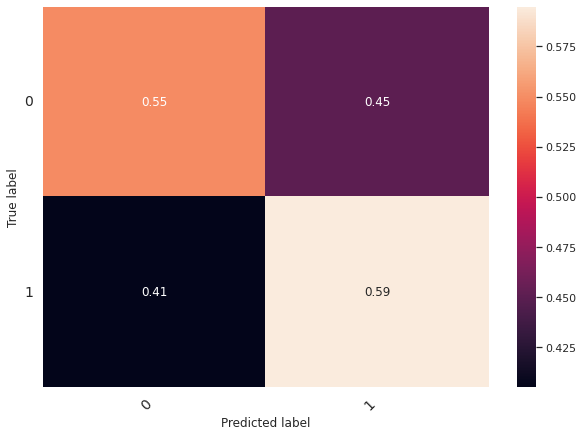

In [ ]:
# Confusion Matrix for Logistic Regression

# Calculate confusion matrix
confusion_matrix_lr = confusion_matrix(y_true = test['target'],
                    y_pred = pred_class_test)

# Turn matrix to percentages
confusion_matrix_lr = confusion_matrix_lr.astype('float') / confusion_matrix_lr.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_lr, index=[0, 1], columns=[0, 1],
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

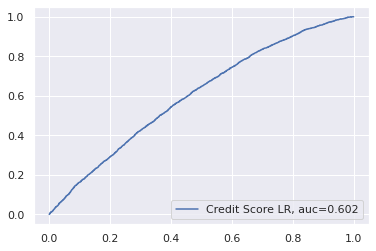

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test['target'], probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test['target'],
                             y_score = probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Credit Score LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Question 4: Using Ensemble Models



###a. Random Forest Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Define the classifier
creditcard_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.0001, # Minimum samples in a leaf. Accepts fractions for %.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.00001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=251253766, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

Let us train this random forest model on our training data

In [ ]:
# credit_df_noWOE = pd.read_csv("credit_model_cleaned (3).csv")
# credit_df_noWOE.head()

In [ ]:
# Same train-test split as before (because of seed!)
# credit_df_train_noWOE, credit_df_test_noWOE = sc.split_df(credit_df_noWOE,
#                                                         y = 'target',
#                                                         ratio = 0.7,
#                                                         seed = 251253766).values()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 5 to 49998
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   payment_day                  14998 non-null  int64  
 1   application_submission_type  14998 non-null  object 
 2   marital_status               14998 non-null  int64  
 3   quant_dependants             14998 non-null  int64  
 4   state_of_birth               14998 non-null  object 
 5   residencial_state            14998 non-null  object 
 6   flag_residencial_phone       14998 non-null  object 
 7   residence_type               14998 non-null  float64
 8   months_in_residence          14998 non-null  float64
 9   personal_monthly_income      14998 non-null  float64
 10  other_incomes                14998 non-null  float64
 11  quant_banking_accounts       14998 non-null  int64  
 12  quant_cars                   14998 non-null  int64  
 13  company         

In [ ]:
#creating dummy variables

credit_df_train_noWOE_dummies = pd.get_dummies(train)
credit_df_test_noWOE_dummies = pd.get_dummies(test)

In [ ]:
credit_modelling_df_dummies = pd.get_dummies(credit_modelling_df)

In [ ]:
credit_df_train_noWOE_dummies.head()

,payment_day,marital_status,quant_dependants,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards,application_submission_type_Carga,application_submission_type_None,application_submission_type_Web,state_of_birth_AC,state_of_birth_AL,state_of_birth_AM,state_of_birth_AP,state_of_birth_BA,state_of_birth_CE,state_of_birth_DF,state_of_birth_ES,state_of_birth_GO,state_of_birth_MA,state_of_birth_MG,state_of_birth_MS,state_of_birth_MT,state_of_birth_PA,state_of_birth_PB,state_of_birth_PE,state_of_birth_PI,state_of_birth_PR,...,residencial_state_RR,residencial_state_RS,residencial_state_SC,residencial_state_SE,residencial_state_SP,residencial_state_TO,flag_residencial_phone_N,flag_residencial_phone_Y,company_N,company_Y,professional_state_AC,professional_state_AL,professional_state_AM,professional_state_AP,professional_state_BA,professional_state_CE,professional_state_DF,professional_state_ES,professional_state_GO,professional_state_MA,professional_state_MG,professional_state_MS,professional_state_MT,professional_state_NA,professional_state_PA,professional_state_PB,professional_state_PE,professional_state_PI,professional_state_PR,professional_state_RJ,professional_state_RN,professional_state_RO,professional_state_RR,professional_state_RS,professional_state_SC,professional_state_SE,professional_state_SP,professional_state_TO,flag_professional_phone_N,flag_professional_phone_Y
0,5,6,1,1.0,15.0,900.0,0.0,0,0,9,4,1,32.0,595,595,1,900.0,450.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15,2,0,1.0,1.0,750.0,0.0,0,0,11,4,1,34.0,230,230,1,750.0,750.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5,2,0,1.0,6.0,500.0,0.0,0,0,11,6,1,27.0,591,591,0,500.0,500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20,2,0,1.0,6.0,500.0,0.0,0,0,19,6,1,61.0,545,545,0,500.0,500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,2,0,1.0,12.0,1200.0,0.0,0,0,9,5,1,48.0,235,235,1,1200.0,1200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
credit_modelling_df_dummies.loc[:, credit_modelling_df_dummies.columns != 'target'].head(1)

,id_client,payment_day,marital_status,quant_dependants,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,total_income,total_income_per_dependant,total_cards,application_submission_type_Carga,application_submission_type_None,application_submission_type_Web,state_of_birth_AC,state_of_birth_AL,state_of_birth_AM,state_of_birth_AP,state_of_birth_BA,state_of_birth_CE,state_of_birth_DF,state_of_birth_ES,state_of_birth_GO,state_of_birth_MA,state_of_birth_MG,state_of_birth_MS,state_of_birth_MT,state_of_birth_PA,state_of_birth_PB,state_of_birth_PE,state_of_birth_PI,state_of_birth_PR,...,residencial_state_RR,residencial_state_RS,residencial_state_SC,residencial_state_SE,residencial_state_SP,residencial_state_TO,flag_residencial_phone_N,flag_residencial_phone_Y,company_N,company_Y,professional_state_AC,professional_state_AL,professional_state_AM,professional_state_AP,professional_state_BA,professional_state_CE,professional_state_DF,professional_state_ES,professional_state_GO,professional_state_MA,professional_state_MG,professional_state_MS,professional_state_MT,professional_state_NA,professional_state_PA,professional_state_PB,professional_state_PE,professional_state_PI,professional_state_PR,professional_state_RJ,professional_state_RN,professional_state_RO,professional_state_RR,professional_state_RS,professional_state_SC,professional_state_SE,professional_state_SP,professional_state_TO,flag_professional_phone_N,flag_professional_phone_Y
0,1,5,6,1,1.0,15.0,900.0,0.0,0,0,9,4,1,32.0,595,595,900.0,450.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# train,test split

train_dummies, test_dummies = sc.split_df(credit_modelling_df_dummies.iloc[:,1:], # Dropping the id column
                          y = 'target', # choosing 'target' as y
                          ratio = 0.7,
                          seed = 251253766).values()

In [ ]:
train_dummies.to_csv('train_dummy.csv',index = False)
test_dummies.to_csv('test_dummy.csv',index = False)
credit_modelling_df_dummies.to_csv('credit_modelling_df_dummies.csv',index=False)
files.download("train_dummy.csv")
files.download("test_dummy.csv")
files.download("credit_modelling_df_dummies.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Train the RF.
creditcard_rf.fit(train_dummies.loc[:, train_dummies.columns != 'target'], # X
                 train_dummies['target']    # y
                )

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   10.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   40.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   50.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_impurity_decrease=1e-05, min_samples_leaf=0.0001,
                       n_estimators=1000, n_jobs=2, oob_score=True,
                       random_state=251253766, verbose=1)

In [ ]:
# Apply the model to the test set.
rf_pred_class_test = creditcard_rf.predict(test_dummies.loc[:, test_dummies.columns != 'target'])
rf_probs_test = creditcard_rf.predict_proba(test_dummies.loc[:, test_dummies.columns != 'target'])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.4s finished


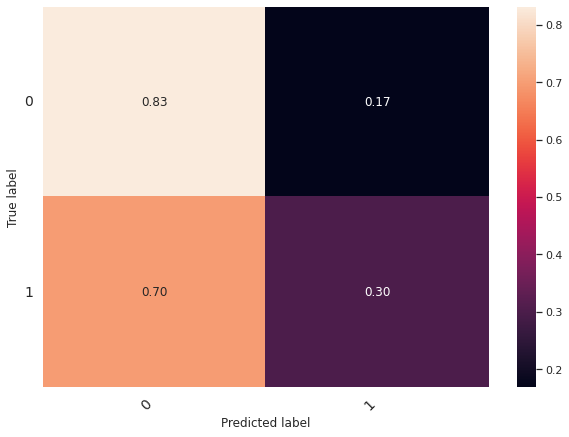

In [ ]:
# Confusion Matrix for Random Forest Classifier

# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = test['target'],
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=[0, 1], columns=[0, 1],
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

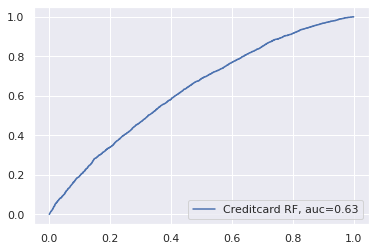

In [ ]:
# # Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_dummies['target'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_dummies['target'],
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Creditcard RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[0.03853372 0.02787629 0.02262433 0.01253865 0.06323984 0.07687669
 0.02578556 0.03136353 0.01041505 0.10845331 0.07767044 0.07820483
 0.07709978 0.0813098  0.01236273 0.01079569 0.0119157 ]
[ 9 13 11 10 12  5  4  0  7  1  6  2  3 14 16 15  8]


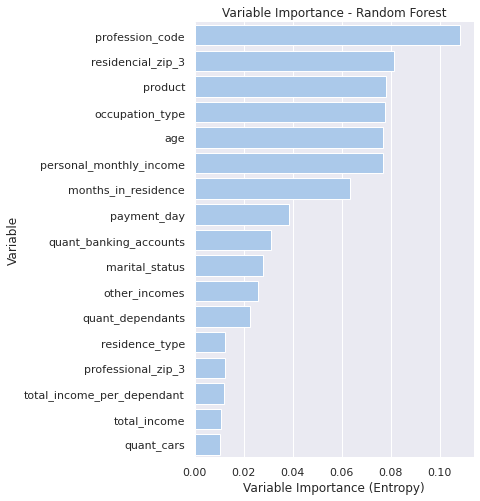

In [ ]:
# Feature Importance

# Plot variable importance
importances = creditcard_rf.feature_importances_
# importances_non0 = importances[np.where(importances > 0.01)]
importances_non0 = importances[(importances > 0.01)]
print(importances_non0)
indices_non0 = np.argsort(importances_non0)[::-1]
print(indices_non0)

f, ax = plt.subplots(figsize=(5, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[train_dummies.loc[:, train_dummies.columns != 'target'].columns[i] for i in indices_non0], x=importances_non0[indices_non0],
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

### b. XGBoost

In [ ]:
from xgboost import XGBClassifier
#Define the classifier.
XGB_Creditcard = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=50,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251253766,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='hist',          # How to train the trees?
                            #gpu_id=0                      # With which GPU?
                            )

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [ ]:
# If Starting to run from here, read the train file in

# train_dummies_xgb = pd.read_csv("train_dummy (2).csv")
# test_dummies_xgb = pd.read_csv("test_dummy (2).csv")
train_dummies_xgb = train_dummies.copy()
test_dummies_xgb = test_dummies.copy()

train_dummies_xgb.head()

,payment_day,marital_status,quant_dependants,residence_type,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,quant_cars,profession_code,occupation_type,product,age,residencial_zip_3,professional_zip_3,target,total_income,total_income_per_dependant,total_cards,application_submission_type_Carga,application_submission_type_None,application_submission_type_Web,state_of_birth_AC,state_of_birth_AL,state_of_birth_AM,state_of_birth_AP,state_of_birth_BA,state_of_birth_CE,state_of_birth_DF,state_of_birth_ES,state_of_birth_GO,state_of_birth_MA,state_of_birth_MG,state_of_birth_MS,state_of_birth_MT,state_of_birth_PA,state_of_birth_PB,state_of_birth_PE,state_of_birth_PI,state_of_birth_PR,...,residencial_state_RR,residencial_state_RS,residencial_state_SC,residencial_state_SE,residencial_state_SP,residencial_state_TO,flag_residencial_phone_N,flag_residencial_phone_Y,company_N,company_Y,professional_state_AC,professional_state_AL,professional_state_AM,professional_state_AP,professional_state_BA,professional_state_CE,professional_state_DF,professional_state_ES,professional_state_GO,professional_state_MA,professional_state_MG,professional_state_MS,professional_state_MT,professional_state_NA,professional_state_PA,professional_state_PB,professional_state_PE,professional_state_PI,professional_state_PR,professional_state_RJ,professional_state_RN,professional_state_RO,professional_state_RR,professional_state_RS,professional_state_SC,professional_state_SE,professional_state_SP,professional_state_TO,flag_professional_phone_N,flag_professional_phone_Y
0,5,6,1,1.0,15.0,900.0,0.0,0,0,9,4,1,32.0,595,595,1,900.0,450.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15,2,0,1.0,1.0,750.0,0.0,0,0,11,4,1,34.0,230,230,1,750.0,750.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5,2,0,1.0,6.0,500.0,0.0,0,0,11,6,1,27.0,591,591,0,500.0,500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20,2,0,1.0,6.0,500.0,0.0,0,0,19,6,1,61.0,545,545,0,500.0,500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,2,0,1.0,12.0,1200.0,0.0,0,0,9,5,1,48.0,235,235,1,1200.0,1200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = train_dummies_xgb.sample(frac = 0.5,               # The fraction to extract.# Choosing 20% to start
                                       random_state = 251253766,    # The seed.
                                       )

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_Creditcard,        # Original XGB.
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
# Train grid search.
GridXGB.fit(val_train.loc[:, val_train.columns != 'target'], val_train['target'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(gamma=0.001, max_depth=2, n_estimators=50,
                                     n_jobs=2, random_state=251253766,
                                     reg_alpha=1, reg_lambda=0, subsample=0.632,
                                     tree_method='hist'),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit=False, scoring='roc_auc', verbose=1)

In [ ]:
# Show best params
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.609


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
# Create XGB with best parameters.
XGB_Creditcard_best = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=251253766,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method='gpu_exact',       # How to train the trees?
                            #gpu_id=0                      # With which GPU?
                            )

In [ ]:
# Train over all training data.
XGB_Creditcard_best.fit(train_dummies_xgb.loc[:, train_dummies_xgb.columns != 'target'], train_dummies_xgb['target'])

XGBClassifier(gamma=0.001, max_depth=2, n_estimators=150,
              random_state=251253766, reg_alpha=1, reg_lambda=0,
              subsample=0.632, tree_method='gpu_exact')

[0.14928696 0.03118746 0.00400611 0.24275318 0.00687117 0.00401998
 0.00562862 0.00316681 0.2898747  0.2166218  0.00591762 0.00350646]
[ 8  3  9  0  1  4 10  6  5  2 11  7]


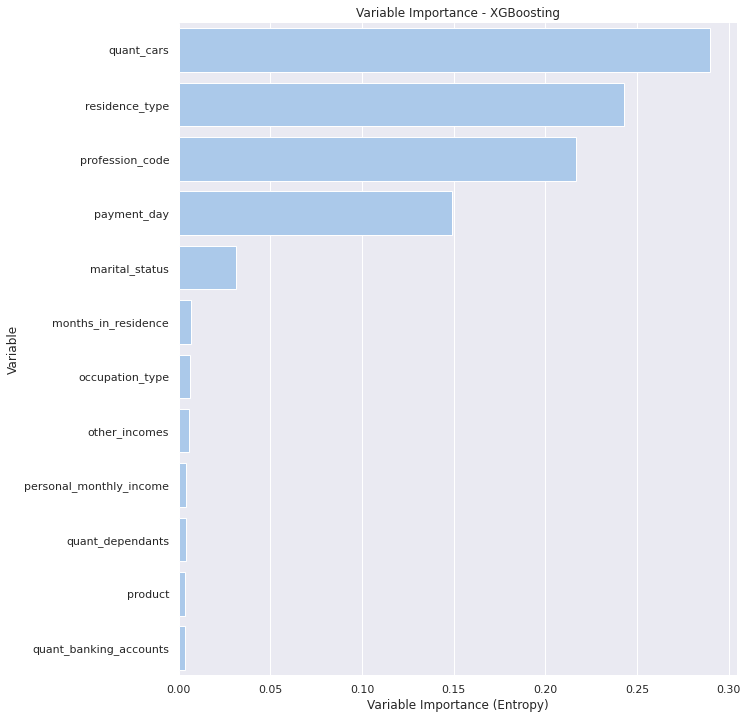

In [ ]:
# Plot variable importance
importances = XGB_Creditcard_best.feature_importances_
#importances_non0 = importances[np.where(importances > 0.003)]
importances_filter = importances[(importances > 0.003)]
print(importances_filter)
indices_filter = np.argsort(importances_filter)[::-1]

print(indices_filter)

f, ax = plt.subplots(figsize=(10, 12))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[train_dummies_xgb.loc[:, train_dummies_xgb.columns != 'target'].columns[i] for i in indices_filter], x=importances_filter[indices_filter],
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

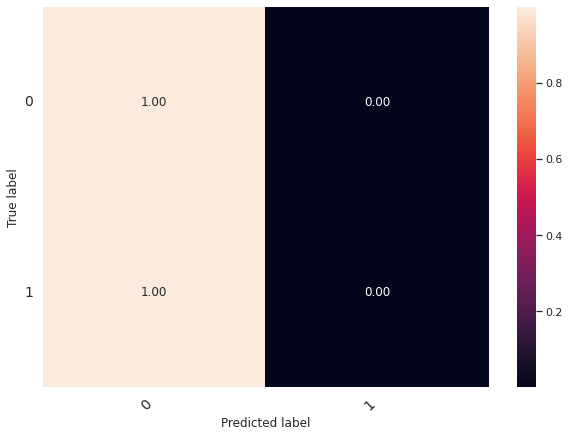

In [ ]:
# Calculate probability
XGBClassTest = XGB_Creditcard_best.predict(test_dummies_xgb.loc[:, test_dummies_xgb.columns != 'target'])
xg_probs_test = XGB_Creditcard_best.predict_proba(test_dummies_xgb.loc[:, test_dummies_xgb.columns != 'target'])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = test_dummies_xgb['target'],
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['0', '1'], columns=['0', '1'],
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

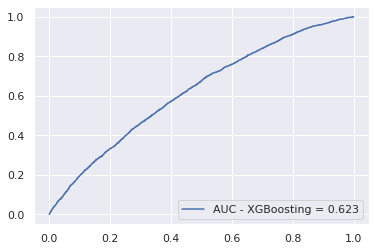

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test_dummies_xgb['target'],
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test_dummies_xgb['target'],
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

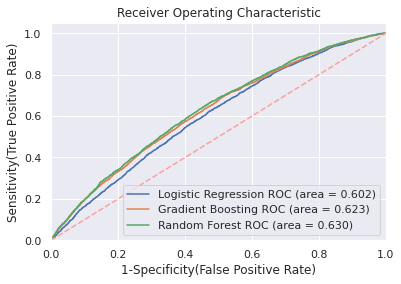

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'probs': probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = test['target'],
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(test_dummies['target'],
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))



# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot!
plt.show()